# Install Requirements

In [2]:
%pip install pandas matplotlib matplotlib-venn


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Data

In [4]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [5]:
prefixes = ["https://", "http://", "www.", '"']
suffixes = ["/", '"']


def strip_url(url: str) -> str:
    for prefix in sorted(prefixes):
        if url.startswith(prefix):
            url = url[len(prefix) :]
    for suffix in sorted(suffixes):
        if url.endswith(suffix):
            url = url[: -len(suffix)]
    return url.strip()


urls = [
    "http://muurmooi.nl/",
    "museumpassmusees.be",
    '"wikipedia.org "',
    "http://www.fonq.nl",
]
expecteds = ["muurmooi.nl", "museumpassmusees.be", "wikipedia.org", "fonq.nl"]

for url, expected in zip(urls, expecteds):
    stripped = strip_url(url)
    assert stripped == expected, f"Got: {stripped}\tExpected: {expected}"

In [6]:
BRONNEN_DB_DIR = DATA_DIR / Path("Bronnen DB")
assert BRONNEN_DB_DIR.is_dir()

BRONNEN_FILE = BRONNEN_DB_DIR / Path(
    "Bronnen DB ebb1bca364c64cfebc8109b4fc3951eb_all.csv"
)
assert BRONNEN_FILE.is_file()

In [7]:
sources = (
    pd.read_csv(
        BRONNEN_FILE,
        keep_default_na=True,
        dtype={"uBlocked trackers": "Int64"},
        converters={"Name": strip_url},
    )
    .dropna(subset=["Name", "NR"])
    .set_index("Name", verify_integrity=True)
)
sources.head()

URL Domein  \
Name                                              
24baby.nl                https://www.24baby.nl/   
24kitchen.nl           https://www.24kitchen.nl   
333travel.nl          https://www.333travel.nl/   
absolutefacts.nl  https://www.absolutefacts.nl/   
accuautoshop.nl    https://www.accuautoshop.nl/   

                                        Conclusie over doel vd bron  \
Name                                                                  
24baby.nl                        informatieproduct div. commercieel   
24kitchen.nl      entertainment, informatieproduct div. commercieel   
333travel.nl                       webshop/winkel+promotioneel deel   
absolutefacts.nl                 informatieproduct div. commercieel   
accuautoshop.nl                    webshop/winkel+promotioneel deel   

                 Thumbs up 8-14?                    Sector  \
Name                                                         
24baby.nl           Just-in-case  Winkels en bedrijven div   
24kitchen.nl        Just-in-case   Entertainment-industrie   
333travel.nl        Just-in-case          Reisorganisaties   
absolutefacts.nl         Twijfel          Online-bedrijven   
accuautoshop.nl              Nee  Winkels en bedrijven div   

                                                            Reclame  \
Name                                                                  
24baby.nl                                          over_the_top_ads   
24kitchen.nl      company_promotion, limited_ads, sluikreclame -...   
333travel.nl                                      company_promotion   
absolutefacts.nl                                  company_promotion   
accuautoshop.nl                                   company_promotion   

                                        Vrije labels bron/onderwerp  \
Name                                                                  
24baby.nl         link/reclamevehikel, nieuws, promotioneel, web...   
24kitchen.nl              entertainment, infotainment, promotioneel   
333travel.nl      (product)informatie ihkv verkoop/bezoek, bedri...   
absolutefacts.nl        abo-print, informatie_primair_doel, webshop   
accuautoshop.nl                                             webshop   

                  uBlocked trackers Commercialiteit   Onderwerpen  \
Name                                                                
24baby.nl                         5     commercieel           NaN   
24kitchen.nl                     17     commercieel           NaN   
333travel.nl                      7     commercieel           NaN   
absolutefacts.nl                  2     commercieel  geschiedenis   
accuautoshop.nl                   6     commercieel           NaN   

                 Div Labels NGO  ...               Created time  \
Name                             ...                              
24baby.nl                   NaN  ...  November 6, 2023 11:09 AM   
24kitchen.nl                NaN  ...  December 14, 2023 6:43 PM   
333travel.nl                NaN  ...  February 23, 2024 5:35 PM   
absolutefacts.nl            NaN  ...  December 14, 2023 7:29 PM   
accuautoshop.nl             NaN  ...  February 22, 2024 3:23 PM   

                        Created by  \
Name                                 
24baby.nl         Maarten Sprenger   
24kitchen.nl      Maarten Sprenger   
333travel.nl      Maarten Sprenger   
absolutefacts.nl  Maarten Sprenger   
accuautoshop.nl   Maarten Sprenger   

                                                  URL Moederbedrijf  \
Name                                                                  
24baby.nl                                                       NaN   
24kitchen.nl      https://privacy.thewaltdisneycompany.com/nl/de...   
333travel.nl                                                    NaN   
absolutefacts.nl                    https://www.absolutefigures.nl/   
accuautoshop.nl                                                 NaN   

                 SlimZ Resultat

In [8]:
sources.columns

Index(['URL Domein', 'Conclusie over doel vd bron', 'Thumbs up 8-14?',
       'Sector', 'Reclame', 'Vrije labels bron/onderwerp', 'uBlocked trackers',
       'Commercialiteit', 'Onderwerpen', 'Div Labels NGO', 'Status',
       'About page', ' Notes', 'Kwaliteit_about', 'Instelling/Bedrijf/Persoon',
       'Resultaten: vrije labels', 'Moederbedrijf DB', 'NR',
       'Toegankelijkheidspagina', 'Resultaten DB', 'Extra URL', 'Created time',
       'Created by', 'URL Moederbedrijf', 'SlimZ Resultaten DB',
       'Resultaten: toegankelijkheid', 'Cookie info page', 'More examples',
       'Related to Resultaten DB 01 (1) (Bronnen DB)', 'Res: Ranking',
       'Res: soort result '],
      dtype='object')

In [9]:
len(sources)

542

## Load Query DB

In [22]:
QUERY_DIR = DATA_DIR / Path("Query DB")
assert QUERY_DIR.is_dir()

QUERY_FILE = QUERY_DIR / Path(
    "Query DB 01 5a4aec0449af4acc87a45c19be574353/Untitled cacf3a0313a84561bac9b6ea48ecc189_all.csv"
)
assert QUERY_FILE.is_file()

In [23]:
all_queries = pd.read_csv(QUERY_FILE)
all_queries.head()

Query Add Results  \
0                 leven        Done   
1  wat betekent schotse        Done   
2      middellandse zee        Done   
3            De smurfen        Done   
4          keurmerk max        Done   

                                              Google  \
0  https://www.google.com/search?q=leven&rlz=1C5C...   
1  https://www.google.com/search?q=wat+betekent+s...   
2  https://www.google.com/search?q=middellandse+z...   
3  https://www.google.nl/search?q=De+smurfen&sca_...   
4  https://www.google.com/search?q=keurmerk+max&r...   

                                         Video Facet Videos-Schooltv?  \
0  https://www.google.com/search?sca_esv=60037616...                -   
1  https://www.google.com/search?sca_esv=60037616...                -   
2  https://www.google.com/search?sca_esv=60037616...                -   
3  https://www.google.nl/search?sca_esv=578451392...                -   
4  https://www.google.com/search?sca_esv=60037616...                -   

  Kennisvenster? 'Samenvatting'?  \
0            Nee             Nee   
1            Nee              Ja   
2  Ja uitgebreid             Nee   
3             Ja             Nee   
4            Nee             Nee   

                                    Extra (top-down)  \
0  Gerelateerde zoekopdrachten (na 10), Meer om t...   
1                           Vragen van anderen (top)   
2  Afbeeldingen carroussel (top), Gerelateerde zo...   
3  Gerelateerde zoekopdrachten (na 10), Meer om t...   
4  Gerelateerde zoekopdrachten (na 10), Meer om t...   

                                         Opmerkingen Soort Query (select)  \
0  Bij Video’s (na 2) staat de Maan-song Leven ge...         Named entity   
1                                                NaN               Vragen   
2                                                NaN         Named entity   
3                                                NaN         Named entity   
4                                                NaN    2 of meer woorden   

   ... Leeftijd                                      Resultaten DB  OK-100  \
0  ...        8                                                NaN     Yes   
1  ...       10  Schotse - 2 definities - Encyclo (https://www....     Yes   
2  ...       11                                                NaN     Yes   
3  ...       10                                                NaN     Yes   
4  ...        7                                                NaN     Yes   

  Ranking Conclusie Date                                         Bronnen DB  \
0               NaN  NaN                                                NaN   
1               NaN  NaN                                                NaN   
2               NaN  NaN                                                NaN   
3               NaN  NaN  google.nl/com (https://www.notion.so/google-nl...   
4               NaN  NaN                                                NaN   

            Created time Bronnen DB 1 Bronnen: Thumbs up?  Bronnen: Toeg.  
0  July 18, 2023 7:47 PM          NaN                 NaN             NaN  
1  July 18, 2023 7:47 PM          NaN                 NaN             NaN  
2  July 18, 2023 7:47 PM          NaN                 NaN             NaN  
3  July 18, 2023 7:47 PM          NaN                 NaN             NaN  
4  July 18, 2023 7:47 PM          NaN                 NaN             NaN  

[5 rows x 22 columns]

In [24]:
all_queries.columns

Index(['Query', 'Add Results', 'Google', 'Video Facet', 'Videos-Schooltv?',
       'Kennisvenster?', ''Samenvatting'?', 'Extra (top-down)', 'Opmerkingen',
       'Soort Query (select)', 'Extra (multi)', 'Onderwerp', 'Leeftijd',
       'Resultaten DB', 'OK-100', 'Ranking Conclusie', 'Date', 'Bronnen DB',
       'Created time', 'Bronnen DB 1', 'Bronnen: Thumbs up?',
       'Bronnen: Toeg.'],
      dtype='object')

In [25]:

queries = (
    all_queries[all_queries["OK-100"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

Query Add Results  \
0                 leven        Done   
1  wat betekent schotse        Done   
2      middellandse zee        Done   
3            De smurfen        Done   
4          keurmerk max        Done   

                                              Google  \
0  https://www.google.com/search?q=leven&rlz=1C5C...   
1  https://www.google.com/search?q=wat+betekent+s...   
2  https://www.google.com/search?q=middellandse+z...   
3  https://www.google.nl/search?q=De+smurfen&sca_...   
4  https://www.google.com/search?q=keurmerk+max&r...   

                                         Video Facet Videos-Schooltv?  \
0  https://www.google.com/search?sca_esv=60037616...                -   
1  https://www.google.com/search?sca_esv=60037616...                -   
2  https://www.google.com/search?sca_esv=60037616...                -   
3  https://www.google.nl/search?sca_esv=578451392...                -   
4  https://www.google.com/search?sca_esv=60037616...                -   

  Kennisvenster? 'Samenvatting'?  \
0            Nee             Nee   
1            Nee              Ja   
2  Ja uitgebreid             Nee   
3             Ja             Nee   
4            Nee             Nee   

                                    Extra (top-down)  \
0  Gerelateerde zoekopdrachten (na 10), Meer om t...   
1                           Vragen van anderen (top)   
2  Afbeeldingen carroussel (top), Gerelateerde zo...   
3  Gerelateerde zoekopdrachten (na 10), Meer om t...   
4  Gerelateerde zoekopdrachten (na 10), Meer om t...   

                                         Opmerkingen Soort Query (select)  \
0  Bij Video’s (na 2) staat de Maan-song Leven ge...         Named entity   
1                                                NaN               Vragen   
2                                                NaN         Named entity   
3                                                NaN         Named entity   
4                                                NaN    2 of meer woorden   

   ...        Onderwerp Leeftijd  \
0  ...  Natuur/Biologie        8   
1  ...     Taal/Cultuur       10   
2  ...   Aardrijkskunde       11   
3  ...     Taal/Cultuur       10   
4  ...     Maatschappij        7   

                                       Resultaten DB OK-100 Ranking Conclusie  \
0                                                NaN    Yes               NaN   
1  Schotse - 2 definities - Encyclo (https://www....    Yes               NaN   
2                                                NaN    Yes               NaN   
3                                                NaN    Yes               NaN   
4                                                NaN    Yes               NaN   

  Date                                         Bronnen DB Bronnen DB 1  \
0  NaN                                                NaN          NaN   
1  NaN                                                NaN          NaN   
2  NaN                                                NaN          NaN   
3  NaN  google.nl/com (https://www.notion.so/google-nl...          NaN   
4  NaN                                                NaN          NaN   

   Bronnen: Thumbs up?  Bronnen: Toeg.  
0                  NaN             NaN  
1                  NaN             NaN  
2                  NaN             NaN  
3                  NaN             NaN  
4                  NaN             NaN  

[5 rows x 21 columns]

In [26]:
len(queries)

100

## Load Results DB

In [32]:
RESULTS_DIR = DATA_DIR / Path("Resultaten DB")
assert RESULTS_DIR.is_dir()

RESULTS_FILE = RESULTS_DIR / Path(
    "Resultaten DB 01 a7ef3ccdfad447148261278e6ca29856_all.csv"
)
assert RESULTS_FILE.is_file()

In [33]:
results = (
    pd.read_csv(
        RESULTS_FILE,
        converters={"Bronnen DB": str.strip},
    )
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype(), "Ranking": "Int64"})
)
results.head()

Bron: Thumbs up?                          Titel resultaat  \
0     Just-in-case         Schotse - 2 definities - Encyclo   
1              Nee  Gratis woordenboek | Van Dale NEDERLAND   
2     Just-in-case                 Schots - WikiWoordenboek   
3               Ja          Wat is de betekenis van Schotse   
4               Ja                    Schotland - Wikipedia   

                                      Link/resultaat  \
0  https://www.encyclo.nl/begrip/schotse#:~:text=...   
1  https://www.vandale.nl/gratis-woordenboek/nede...   
2              https://nl.wiktionary.org/wiki/Schots   
3             https://www.ensie.nl/betekenis/schotse   
4            https://nl.wikipedia.org/wiki/Schotland   

                                               Query Relevant?  \
0  wat betekent schotse (https://www.notion.so/wa...  relevant   
1  wat betekent schotse (https://www.notion.so/wa...  relevant   
2  wat betekent schotse (https://www.notion.so/wa...  relevant   
3  wat betekent schotse (https://www.notion.so/wa...  relevant   
4  wat betekent schotse (https://www.notion.so/wa...  relevant   

  vrije tags page                                         Bronnen DB  \
0             NaN  encyclo.nl (https://www.notion.so/encyclo-nl-9...   
1             NaN  vandale.nl (https://www.notion.so/vandale-nl-8...   
2             NaN  wiktionary.org (https://www.notion.so/wiktiona...   
3             NaN  Ensie.nl (https://www.notion.so/Ensie-nl-2aa00...   
4             NaN  wikipedia.org  (https://www.notion.so/wikipedi...   

                      Bron: Inst/Bedrijf Toegankelijkheid doelgroep (indruk)  \
0                   Slot Webcommerce bv.                             complex   
1  Van Dale Uitgevers, Utrecht/Antwerpen                             complex   
2       Wiktionary, Wikimedia foundation                             complex   
3           Stichting Ensie Encyclopedie               redelijk_begrijpelijk   
4               Wikimedia Foundation inc                             complex   

  Soort Resultaat  ...                                         Bron: doel  \
0     informatief  ...  aggregator/contenfarm,informatieproduct div. c...   
1     informatief  ...                 informatieproduct div. commercieel   
2     informatief  ...        gebruikersplatform met kwaliteitsinformatie   
3     informatief  ...                           kwaliteitsinformatie-div   
4     informatief  ...        gebruikersplatform met kwaliteitsinformatie   

  Bron: Trackers OnderzoekNr Ranking  \
0              7           1       1   
1              4           1       3   
2              0           1       6   
3              1           1       7   
4              1           1       8   

  Related to Bronnen DB test (Resultaten DB)         Bronnen: URL domein  \
0                                        NaN              www.encyclo.nl   
1                                        NaN     https://www.vandale.nl/   
2                                        NaN  https://nl.wiktionary.org/   
3                                        NaN       https://www.ensie.nl/   
4                                        NaN   https://nl.wikipedia.org/   

  Query: Video Schooltv        Created by        Bron-Status  Bron: Onderwerp  
0                     -  Maarten Sprenger  Needs peer-review              NaN  
1                     -  Maarten Sprenger               Done              NaN  
2                     -  Maarten Sprenger   Almost completed              NaN  
3                     -  Maarten Sprenger   Almost completed              NaN  
4                     -  Maarten Sprenger               Done              NaN  

[5 rows x 27 columns]

In [35]:
len(results)

998

In [36]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

results[["Query", "Bronnen DB"]]

Query  \
0    wat betekent schotse (https://www.notion.so/wa...   
1    wat betekent schotse (https://www.notion.so/wa...   
2    wat betekent schotse (https://www.notion.so/wa...   
3    wat betekent schotse (https://www.notion.so/wa...   
4    wat betekent schotse (https://www.notion.so/wa...   
..                                                 ...   
993  geld (https://www.notion.so/geld-03503decdc9c4...   
994  geld (https://www.notion.so/geld-03503decdc9c4...   
995  geld (https://www.notion.so/geld-03503decdc9c4...   
996  geld (https://www.notion.so/geld-03503decdc9c4...   
997  geld (https://www.notion.so/geld-03503decdc9c4...   

                                            Bronnen DB  
0    encyclo.nl (https://www.notion.so/encyclo-nl-9...  
1    vandale.nl (https://www.notion.so/vandale-nl-8...  
2    wiktionary.org (https://www.notion.so/wiktiona...  
3    Ensie.nl (https://www.notion.so/Ensie-nl-2aa00...  
4    wikipedia.org  (https://www.notion.so/wikipedi...  
..                                                 ...  
993  telegraaf.nl (https://www.notion.so/telegraaf-...  
994  ad.nl (https://www.notion.so/ad-nl-800ddede7f5...  
995  rtlnieuws.nl (https://www.notion.so/rtlnieuws-...  
996  nibud.nl (https://www.notion.so/nibud-nl-624f2...  
997  rijksoverheid.nl (https://www.notion.so/rijkso...  

[998 rows x 2 columns]

In [37]:
for column in COLUMNS_WITH_LINK:
    results[column] = (
        (results[column].str.split(" \(").str[0])
        .astype(pd.StringDtype())
        .apply(strip_url)
    )
results[COLUMNS_WITH_LINK]

Query        Bronnen DB
0    wat betekent schotse        encyclo.nl
1    wat betekent schotse        vandale.nl
2    wat betekent schotse    wiktionary.org
3    wat betekent schotse          Ensie.nl
4    wat betekent schotse     wikipedia.org
..                    ...               ...
993                  geld      telegraaf.nl
994                  geld             ad.nl
995                  geld      rtlnieuws.nl
996                  geld          nibud.nl
997                  geld  rijksoverheid.nl

[998 rows x 2 columns]

In [38]:
# Filter out results that are not in the 100 queries set
results = results.loc[results["Query"].isin(queries["Query"])]  # .reindex()
len(results)

998

In [39]:
results.columns

Index(['Bron: Thumbs up?', 'Titel resultaat', 'Link/resultaat', 'Query',
       'Relevant?', 'vrije tags page', 'Bronnen DB', 'Bron: Inst/Bedrijf',
       'Toegankelijkheid doelgroep (indruk)', 'Soort Resultaat',
       'Bron: Vrije labels', 'Bron: Commerciality', 'Bron: Sector', 'Q: soort',
       'Bron: reclame', 'Opmerking', 'Q: Ranking vrije labels', 'Bron: doel',
       'Bron: Trackers', 'OnderzoekNr', 'Ranking',
       'Related to Bronnen DB test (Resultaten DB)', 'Bronnen: URL domein',
       'Query: Video Schooltv', 'Created by', 'Bron-Status',
       'Bron: Onderwerp'],
      dtype='object')

## Join Results and Sources

In [40]:
results_sources = results.join(
    sources, on="Bronnen DB", how="left", lsuffix="_source", rsuffix="_result"
)

results_sources

Bron: Thumbs up?                                    Titel resultaat  \
0       Just-in-case                   Schotse - 2 definities - Encyclo   
1                Nee            Gratis woordenboek | Van Dale NEDERLAND   
2       Just-in-case                           Schots - WikiWoordenboek   
3                 Ja                    Wat is de betekenis van Schotse   
4                 Ja                              Schotland - Wikipedia   
..               ...                                                ...   
993     Just-in-case  Geld | Het laatste nieuws uit Nederland lees j...   
994     Just-in-case                                       Geld | AD.nl   
995     Just-in-case                                  Geld | RTL Nieuws   
996               Ja  Het Nibud (Nationaal Instituut voor Budgetvoor...   
997               Ja  Hoeveel contant geld mag ik thuis bewaren? | R...   

                                        Link/resultaat                 Query  \
0    https://www.encyclo.nl/begrip/schotse#:~:text=...  wat betekent schotse   
1    https://www.vandale.nl/gratis-woordenboek/nede...  wat betekent schotse   
2                https://nl.wiktionary.org/wiki/Schots  wat betekent schotse   
3               https://www.ensie.nl/betekenis/schotse  wat betekent schotse   
4              https://nl.wikipedia.org/wiki/Schotland  wat betekent schotse   
..                                                 ...                   ...   
993           https://www.telegraaf.nl/financieel/geld                  geld   
994  https://www.ad.nl/geld/?referrer=https%3A%2F%2...                  geld   
995  https://www.rtlnieuws.nl/tags/onderwerpen/econ...                  geld   
996                              https://www.nibud.nl/                  geld   
997  https://www.rijksoverheid.nl/onderwerpen/geldz...                  geld   

     Relevant? vrije tags page        Bronnen DB  \
0     relevant             NaN        encyclo.nl   
1     relevant             NaN        vandale.nl   
2     relevant             NaN    wiktionary.org   
3     relevant             NaN          Ensie.nl   
4     relevant             NaN     wikipedia.org   
..         ...             ...               ...   
993   relevant             NaN      telegraaf.nl   
994   relevant             NaN             ad.nl   
995   relevant             NaN      rtlnieuws.nl   
996  misschien        homepage          nibud.nl   
997  misschien             NaN  rijksoverheid.nl   

                                    Bron: Inst/Bedrijf  \
0                                 Slot Webcommerce bv.   
1                Van Dale Uitgevers, Utrecht/Antwerpen   
2                     Wiktionary, Wikimedia foundation   
3                         Stichting Ensie Encyclopedie   
4                             Wikimedia Foundation inc   
..                                                 ...   
993             De Telegraaf, Mediahuis Nederland B.V.   
994                                AD, DPG Media Group   
995                                 RTL Nederland B.V.   
996  Nibud (Nationaal Instituut voor Budgetvoorlich...   
997                                      Rijksoverheid   

    Toegankelijkheid doelgroep (indruk) Soort Resultaat  ...  \
0                               complex     informatief  ...   
1                               complex     informatief  ...   
2                               complex     informatief  ...   
3                 redelijk_begrijpelijk     informatief  ...   
4                               complex     informatief  ...   
..                                  ...             ...  ...   
993                                 nvt    navigational  ...   
994                                 nvt    navigational  ...   
995                                 nvt    navigational  ...   
996               redelijk_begrijpelijk     informatief  ...   
997               redelijk_begrijpelijk     informatief  ...   

                   Created time Created by_result  

In [41]:
results_sources.columns

Index(['Bron: Thumbs up?', 'Titel resultaat', 'Link/resultaat', 'Query',
       'Relevant?', 'vrije tags page', 'Bronnen DB', 'Bron: Inst/Bedrijf',
       'Toegankelijkheid doelgroep (indruk)', 'Soort Resultaat',
       'Bron: Vrije labels', 'Bron: Commerciality', 'Bron: Sector', 'Q: soort',
       'Bron: reclame', 'Opmerking', 'Q: Ranking vrije labels', 'Bron: doel',
       'Bron: Trackers', 'OnderzoekNr', 'Ranking',
       'Related to Bronnen DB test (Resultaten DB)', 'Bronnen: URL domein',
       'Query: Video Schooltv', 'Created by_source', 'Bron-Status',
       'Bron: Onderwerp', 'URL Domein', 'Conclusie over doel vd bron',
       'Thumbs up 8-14?', 'Sector', 'Reclame', 'Vrije labels bron/onderwerp',
       'uBlocked trackers', 'Commercialiteit', 'Onderwerpen', 'Div Labels NGO',
       'Status', 'About page', ' Notes', 'Kwaliteit_about',
       'Instelling/Bedrijf/Persoon', 'Resultaten: vrije labels',
       'Moederbedrijf DB', 'NR', 'Toegankelijkheidspagina', 'Resultaten DB',
   

### DEBUG: results vs sources

In [42]:
sources.loc[sources.index.str.contains("fonq")]

URL Domein Conclusie over doel vd bron Thumbs up 8-14?  \
Name                                                                        
fonq.nl  https://www.fonq.nl/              alleen webshop             Nee   

                           Sector            Reclame  \
Name                                                   
fonq.nl  Winkels en bedrijven div  company_promotion   

        Vrije labels bron/onderwerp  uBlocked trackers Commercialiteit  \
Name                                                                     
fonq.nl                     webshop                  8     commercieel   

        Onderwerpen Div Labels NGO  ...               Created time  \
Name                                ...                              
fonq.nl         NaN            NaN  ...  February 22, 2024 1:54 PM   

               Created by URL Moederbedrijf SlimZ Resultaten DB  \
Name                                                              
fonq.nl  Maarten Sprenger               NaN                 NaN   

        Resultaten: toegankelijkheid Cookie info page More examples  \
Name                                                                  
fonq.nl                          NaN              NaN           NaN   

        Related to Resultaten DB 01 (1) (Bronnen DB) Res: Ranking  \
Name                                                                
fonq.nl                                          NaN          9,5   

                  Res: soort result   
Name                                  
fonq.nl  transactional,transactional  

[1 rows x 31 columns]

In [43]:
results.loc[results["Bronnen DB"].str.contains("fonq")]

Bron: Thumbs up?                                    Titel resultaat  \
210              Nee  Vogelhuis kopen? Kies uit 50+ Vogelhuisjes bij...   
964              Nee  Stijlvolle klokken: vind jouw unieke klok bij ...   

                                        Link/resultaat           Query  \
210  https://www.fonq.nl/producten/categorie-vogelh...  vogels huisjes   
964   https://www.fonq.nl/producten/categorie-klokken/         klokken   

     Relevant?      vrije tags page Bronnen DB Bron: Inst/Bedrijf  \
210  misschien  webshop_result_page    fonq.nl               fonQ   
964   relevant  webshop_result_page    fonq.nl               fonQ   

    Toegankelijkheid doelgroep (indruk) Soort Resultaat  ...      Bron: doel  \
210                                 nvt   transactional  ...  alleen webshop   
964                                 nvt   transactional  ...  alleen webshop   

    Bron: Trackers OnderzoekNr Ranking  \
210              8           1       9   
964              8           1       5   

    Related to Bronnen DB test (Resultaten DB)   Bronnen: URL domein  \
210                                        NaN  https://www.fonq.nl/   
964                                        NaN  https://www.fonq.nl/   

    Query: Video Schooltv        Created by  Bron-Status  Bron: Onderwerp  
210                 8, 10  Maarten Sprenger         Done              NaN  
964                    -   Maarten Sprenger         Done              NaN  

[2 rows x 27 columns]

In [44]:
results.loc[~results["Bronnen DB"].str.strip().isin(sources.index.str.strip())][
    "Bronnen DB"
]

822    Untitled
Name: Bronnen DB, dtype: object

In [45]:
results_sources.loc[results_sources["Commercialiteit"].isna()]

Bron: Thumbs up?           Titel resultaat  \
822     Just-in-case  Kangoeroe - Australie.nl   

                                        Link/resultaat      Query Relevant?  \
822  https://www.australie.nl/australie/reisgids/fl...  kangoeroe  relevant   

    vrije tags page Bronnen DB Bron: Inst/Bedrijf  \
822             NaN   Untitled     GetawayTravel©   

    Toegankelijkheid doelgroep (indruk) Soort Resultaat  ... Created time  \
822               redelijk_begrijpelijk     informatief  ...          NaN   

    Created by_result URL Moederbedrijf SlimZ Resultaten DB  \
822               NaN               NaN                 NaN   

    Resultaten: toegankelijkheid Cookie info page More examples  \
822                          NaN              NaN           NaN   

    Related to Resultaten DB 01 (1) (Bronnen DB)  Res: Ranking  \
822                                          NaN           NaN   

     Res: soort result   
822                 NaN  

[1 rows x 58 columns]

## Match Sources and Queries

In [46]:
query = queries["Query"].sample(n=1).iloc[0]
query

'greta thunberg'

In [47]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
782               Ja                         Greta Thunberg - Wikipedia   
783     Just-in-case  Greta Thunberg (@gretathunberg) • Instagram-fo...   
784               Ja                         Greta Thunberg - Wikipedia   
785              Nee                Greta Thunberg (@GretaThunberg) / X   
786     Just-in-case              greta thunberg - Google Zoeken Videos   
787               Ja  Greta Thunberg: Who is the climate activist an...   
788               Ja                Wie is Greta Thunberg? | NPO Kennis   
789     Just-in-case                          Greta Thunberg | Facebook   
790               Ja  Nooit meer 'klimaatspijbelen', Greta Thunberg ...   
791     Just-in-case  Hoe goed ken jij Greta Thunberg? Test je kenni...   
792     Just-in-case  Greta Thunberg, maakt de weg vrij naar een duu...   

                                        Link/resultaat           Query  \
782       https://nl.wikipedia.org/wiki/Greta_Thunberg  greta thunberg   
783           https://www.instagram.com/gretathunberg/  greta thunberg   
784       https://en.wikipedia.org/wiki/Greta_Thunberg  greta thunberg   
785                  https://twitter.com/GretaThunberg  greta thunberg   
786  https://www.google.nl/search?sca_esv=596572399...  greta thunberg   
787     https://www.bbc.com/news/world-europe-49918719  greta thunberg   
788  https://npokennis.nl/story/596/wie-is-greta-th...  greta thunberg   
789      https://www.facebook.com/gretathunbergsweden/  greta thunberg   
790  https://nos.nl/artikel/2478331-nooit-meer-klim...  greta thunberg   
791  https://www.ad.nl/sterren/hoe-goed-ken-jij-gre...  greta thunberg   
792  https://justiceandpeace.nl/greta-thunberg-maak...  greta thunberg   

         Relevant?         vrije tags page          Bronnen DB  \
782       relevant                     NaN       wikipedia.org   
783       relevant                     NaN       instagram.com   
784       relevant                     NaN       wikipedia.org   
785       relevant                     NaN       twitter.com X   
786       relevant  zoekmachine_facet_link       google.nl/com   
787       relevant                     NaN             bbc.com   
788       relevant                     NaN        npokennis.nl   
789       relevant                     NaN        facebook.com   
790       relevant                     NaN              nos.nl   
791  niet_relevant                     NaN               ad.nl   
792       relevant                     NaN  justiceandpeace.nl   

                     Bron: Inst/Bedrijf Toegankelijkheid doelgroep (indruk)  \
782            Wikimedia Foundation inc                             complex   
783                              (Meta)                                 nvt   
784            Wikimedia Foundation inc                             complex   
785                  X voorheen Twitter                                 nvt   
786                             Aphabet                                 nvt   
787                                 BBC                             complex   
788                   NPO Kennis (NTR)                redelijk_begrijpelijk   
789                                Meta                                 nvt   
790  Nederlandse Omroep Stichting (NOS)               redelijk_begrijpelijk   
791                 AD, DPG Media Group                                 nvt   
792           Justice & Peace Nederland                             complex   

    Soort Resultaat  ...                                         Bron: doel  \
782     informatief  ...        gebruikersplatform met kwaliteitsinformatie   
783    navigational  ...   gebruikersplatform geen kwaliteitsgarantie comm.   
784     informatief  ...        gebruikersplatform met kwaliteitsinformatie   
785    navigational  ...   gebruikersplatform geen kwaliteitsgarantie comm.   
786    navigational  ...                 informatieproduct div. commercieel  

### DEBUG: Queries

In [48]:
set(results_sources.groupby("Query").groups.keys()) - set(queries["Query"])

set()

In [49]:
all_queries.loc[all_queries["Query"] == "cristiano ronaldo"]

Query Add Results  \
11  cristiano ronaldo        Done   

                                               Google Video Facet  \
11  https://www.google.com/search?q=cristiano+rona...         NaN   

   Videos-Schooltv? Kennisvenster? 'Samenvatting'?  \
11              NaN             Ja             Nee   

                                     Extra (top-down)  \
11  Gerelateerde zoekopdrachten (na 10), Meer om t...   

                    Opmerkingen Soort Query (select)  ... Leeftijd  \
11  resultaten apart opgeslagen            Eén woord  ...       11   

   Resultaten DB  OK-100 Ranking Conclusie Date Bronnen DB  \
11           NaN      No               NaN  NaN        NaN   

             Created time Bronnen DB 1 Bronnen: Thumbs up?  Bronnen: Toeg.  
11  July 18, 2023 7:47 PM          NaN                 NaN             NaN  

[1 rows x 22 columns]

In [50]:
results_sources.loc[results_sources["Query"] == "cristiano ronaldo"]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Link/resultaat, Query, Relevant?, vrije tags page, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Soort Resultaat, Bron: Vrije labels, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Q: Ranking vrije labels, Bron: doel, Bron: Trackers, OnderzoekNr, Ranking, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, Query: Video Schooltv, Created by_source, Bron-Status, Bron: Onderwerp, URL Domein, Conclusie over doel vd bron, Thumbs up 8-14?, Sector, Reclame, Vrije labels bron/onderwerp, uBlocked trackers, Commercialiteit, Onderwerpen, Div Labels NGO, Status, About page,  Notes, Kwaliteit_about, Instelling/Bedrijf/Persoon, Resultaten: vrije labels, Moederbedrijf DB, NR, Toegankelijkheidspagina, Resultaten DB, Extra URL, Created time, Created by_result, URL Moederbedrijf, SlimZ Resultaten DB, Resultaten: toegankelijkheid, Cookie info page, More examples, Related to Resultaten DB 01 (1) (Bronnen DB), Res: Ranking, Res: soort result ]
Index: []

[0 rows x 58 columns]

# Analysis

## Results

### Combined Criteria

In [214]:
column = "ok_for_students"
results_sources[column] = (results_sources["Soort Resultaat"] != "transactional") & (
    results_sources["Thumbs up 8-14?"] != "Nee"
)
results_sources[column].sum()

726

In [212]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
0       Just-in-case                   Schotse - 2 definities - Encyclo   
363     Just-in-case  plaatjes van vulkaan - Google Zoeken Afbeeldingen   
373     Just-in-case     Pepernoten / kruidnoten bakken - LeukeRecepten   
382     Just-in-case  Romijn - Herkomst en betekenis van de naam Rom...   
392               Ja       Aanhalingstekens (algemeen) - Taaladvies.net   
..               ...                                                ...   
312     Just-in-case                kindermotors - Google Zoeken videos   
733     Just-in-case                        Prinses Amalia | RTL Nieuws   
442     Just-in-case         Bezienswaardigheden in Engeland - ViaTioga   
71      Just-in-case                          Brussel - WikiWoordenboek   
91      Just-in-case                     ronaldo - Google Zoeken VIDEOS   

                                        Link/resultaat  \
0    https://www.encyclo.nl/begrip/schotse#:~:text=...   
363  https://www.google.nl/search?sca_esv=590945601...   
373  https://www.leukerecepten.nl/recepten/pepernoten/   
382  https://www.24baby.nl/babynamen/romijn/#:~:tex...   
392  https://taaladvies.net/aanhalingstekens-algeme...   
..                                                 ...   
312  https://www.google.nl/search?sca_esv=590880697...   
733  https://www.rtlnieuws.nl/tags/personen/prinses...   
442  https://viatioga.nl/voorpret/bezienswaardighed...   
71              https://nl.wiktionary.org/wiki/Brussel   
91   https://www.google.nl/search?sca_esv=578856877...   

                           Query      Relevant?         vrije tags page  \
0           wat betekent schotse       relevant                     NaN   
363         plaatjes van vulkaan       relevant  zoekmachine_facet_link   
373           pepernooten recept       relevant                     NaN   
382  waar komt de naam Romen van       relevant                     NaN   
392   wat is een begin aanhaling       relevant                     NaN   
..                           ...            ...                     ...   
312                 kindermotors      misschien  zoekmachine_facet_link   
733                       amalia       relevant                     NaN   
442                     engeland       relevant                     NaN   
71                       brussel  niet_relevant                     NaN   
91                       ronaldo       relevant  zoekmachine_facet_link   

           Bronnen DB                                 Bron: Inst/Bedrijf  \
0          encyclo.nl                               Slot Webcommerce bv.   
363     google.nl/com                                            Aphabet   
373  leukerecepten.nl               Sandra Waterschoot Koopmans en  Eric   
382         24baby.nl                                             24baby   
392    taaladvies.net  Samenwerking van Taalunie, Instituut voor de N...   
..                ...                                                ...   
312     google.nl/com                                            Aphabet   
733      rtlnieuws.nl                                 RTL Nederland B.V.   
442       viatioga.nl                                                NaN   
71     wiktionary.org                   Wiktionary, Wikimedia foundation   
91      google.nl/com                                            Aphabet   

    Toegankelijkheid doelgroep (indruk) Soort Resultaat  ...  \
0                               complex     informatief  ...   
363                                 nvt    navigational  ...   
373                           eenvoudig     informatief  ...   
382               redelijk_begrijpelijk     informatief  ...   
392                             complex     informatief  ...   
..                                  ...             ...  ...   
312                                 nvt    navigational  ...   
733                                 nvt    navigational  ...   
442             

In [133]:
column = "good_for_students"
results_sources[column] = (
    (results_sources["Soort Resultaat"] == "informatief")
    & (results_sources["Thumbs up 8-14?"] == "Ja")
    & (
        results["Toegankelijkheid doelgroep (indruk)"].str.contains(
            "redelijk_begrijpelijk"
        )
        | results["Toegankelijkheid doelgroep (indruk)"].str.contains("eenvoudig")
    )
)
results_sources[column].sum()

178

In [134]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
514               Ja  Wat is je spijsvertering? - Maag Lever Darm St...   
253               Ja               Voortplanting (biologie) - Wikipedia   
402               Ja          Watersnoodramp 1953 - Canon van Nederland   
422               Ja                                Marrons - Wikipedia   
443               Ja                      Ik heb diarree | Thuisarts.nl   
..               ...                                                ...   
673               Ja                     Houten galei | Industriemuseum   
49                Ja      Kwaliteit van leven | Volksgezondheid en Zorg   
362               Ja        PowerPoint-presentatie Giraffe Wildlands.nl   
28                Ja  Belgische koning Albert (89) onwel geworden en...   
420               Ja  Vertrekhal Schiphol alleen toegankelijk voor r...   

                                        Link/resultaat  \
514  https://www.mlds.nl/spijsvertering/wat-is-je-s...   
253  https://nl.wikipedia.org/wiki/Voortplanting_(b...   
402  https://www.canonvannederland.nl/nl/zeeland/ve...   
422              https://nl.wikipedia.org/wiki/Marrons   
443    https://www.thuisarts.nl/diarree/ik-heb-diarree   
..                                                 ...   
673  https://www.industriemuseum.be/nl/collectie-it...   
49           https://www.vzinfo.nl/Kwaliteit-van-leven   
362  https://www.wildlands.nl/uploads/animals/Diere...   
28   https://nos.nl/artikel/2480443-belgische-konin...   
420  https://www.parool.nl/nederland/vertrekhal-sch...   

                            Query  Relevant? vrije tags page  \
514                 taak slokdarm   relevant             NaN   
253                 voortplanting   relevant             NaN   
402  westerschelde waternoodsramp   relevant             NaN   
422                       marrons   relevant             NaN   
443                        diaree   relevant             NaN   
..                            ...        ...             ...   
673                         galei   relevant             NaN   
49                          leven  misschien             NaN   
362           waar leven giraffen   relevant             pdf   
28            koning van belgieje   relevant             NaN   
420    vertrekhal met inchekbalie   relevant             NaN   

               Bronnen DB                                 Bron: Inst/Bedrijf  \
514               mlds.nl                          Maag Lever Darm Stichting   
253         wikipedia.org                           Wikimedia Foundation inc   
402  canonvannederland.nl  Nederlands Openluchtmuseum / canonvannederland.nl   
422         wikipedia.org                           Wikimedia Foundation inc   
443          thuisarts.nl  Thuisarts.nl, Het Nederlands Huisartsen Genoot...   
..                    ...                                                ...   
673    industriemuseum.be                                Het Industriemuseum   
49              vzinfo.nl  RIVM in opdracht van het Ministerie van Volksg...   
362          wildlands.nl                                                NaN   
28                 nos.nl                 Nederlandse Omroep Stichting (NOS)   
420             parool.nl                          Het Parool, DPG Media B.V   

    Toegankelijkheid doelgroep (indruk) Soort Resultaat  ...  \
514               redelijk_begrijpelijk     informatief  ...   
253               redelijk_begrijpelijk     informatief  ...   
402               redelijk_begrijpelijk     informatief  ...   
422               redelijk_begrijpelijk     informatief  ...   
443               redelijk_begrijpelijk     informatief  ...   
..                                  ...             ...  ...   
673               redelijk_begrijpelijk     informatief  ...   
49                redelijk_begrijpelijk     informatief  ...   
362               redelijk_begrijpelijk     informatief  ...   
28                            eenvou

In [213]:
column = "bad_for_students"
results_sources[column] = (
    (results_sources["Soort Resultaat"] == "transactional")
    | (
        results_sources["Conclusie over doel vd bron"]
        .fillna("")
        .str.contains("reclamevehikel")
    )
    | (
        results_sources["Conclusie over doel vd bron"]
        .fillna("")
        .str.contains("aggregator")
    )
    | (
        results_sources["Vrije labels bron/onderwerp"]
        .fillna("")
        .str.contains("clickbait")
    )
    | (results_sources["Vrije labels bron/onderwerp"].fillna("").str.contains("porno"))
)
results_sources[column].sum()

192

In [136]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
0       Just-in-case                   Schotse - 2 definities - Encyclo   
172              Nee                         Blote vrouwen | Naaktkrant   
421     Just-in-case  Vertrekhal Schiphol » Alle Info over de Schiph...   
39      Just-in-case                    Schots - 7 definities - Encyclo   
665     Just-in-case                    Galei - 18 definities - Encyclo   
314     Just-in-case                  Trilling - 8 definities - Encyclo   
173              Nee                Naakte Vrouwen Verzameld - Seks Met   
526              Nee  Verschrikkelijk: mama vergeet peuter op autoda...   
174              Nee  Meest bekeken mooie naakte vrouwen, de top 100...   
414              Nee       Schiphol vertrekhal – Vertrektijden Schiphol   
615     Just-in-case  Braziliaanse voetballegende Pelé op 82-jarige ...   
696              Nee  Vroege vogel of eerder een nachtbraker? Wat je...   
844     Just-in-case                    Sloot - 15 definities - Encyclo   
884          Twijfel  Super Grappige En Schattige Paarden Filmpjes |...   
507              Nee  Straatkinderen. slapen op stenen, eten uit vui...   
175              Nee      Gratis Naakte Vrouwen pornovideo's | xHamster   
164              Nee                 Zebrahaai | DierenWiki | Zebrahaai   
864              Nee                         Otter | DierenWiki | Otter   
165              Nee  De zebrahaai (Stegostoma fasciatum) is een ong...   
357              Nee  Giraffen | DierenWiki - Evenhoevige dieren - G...   
176              Nee  Blote vrouwen gratis kijken! Geile foto's van ...   
915              Nee         Ongewervelden | DierenWiki | Ongewervelden   
974              Nee        Leuke weetjes die jij zeker nog niet kende!   
158              Nee  krant De schoolkrant is terug! Vrijdag 21 dece...   
34           Twijfel             Fairtrade Max Havelaar - Allesduurzaam   
24      Just-in-case  Het bruist in België: zo viert koning Filip zi...   
177              Nee  Dikke Geile Tieten Borsten Blote Vrouwen Meide...   
680              Nee          Ervaren mannen en vrouwen seks hetzelfde?   
530              Nee  Walter Baele geeft de Sint in nieuw kinderboek...   
995     Just-in-case                                  Geld | RTL Nieuws   
229     Just-in-case                   Orgaan - 25 definities - Encyclo   
480              Nee  #DURFTEVRAGEN: Wat is het hoogste gebouw van W...   
339     Just-in-case  Nog een mensensoort ontdekt in ons DNA | RTL N...   
976              Nee  21 nutteloze feiten waarmee je interessant kun...   
160              Nee          DE VEERBOOT PRAKTISCH - PDF Free Download   
179              Nee  Amateur Sex Naakt Foto's Delen Met Amateurs Ie...   
288              Nee  De wolf is helemaal terug. Wat eet hij graag? ...   
490     Just-in-case                   Foetus - 22 definities - Encyclo   
609              Nee                              Camille Dhont - KW.be   
470     Just-in-case                             Autosport | RTL Nieuws   
660     Just-in-case          Groot Barrièrerif — Google Arts & Culture   
418              Nee                      Vertrektijden - Info Schiphol   
351     Just-in-case                       Spiere - definitie - Encyclo   
682              Nee  Dit zijn simpele tips om nog betere seks te he...   
692              Nee                         Merelbeke | http://hln.be    
701              Nee  Hoe word je als nachtbraker net zo gelukkig al...   
180              Nee         Naakte Vrouwen Porno Video's | Pornhub.com   
878              Nee                                           Kerstmis   
743              Nee  Nijlpaarden | DierenWiki | Zoogdieren > Nijlpa...   
181              Nee                                       nl.biguz.net   
401               Ja  Correct gebruik van aanhalingstekens – Correct...   
170              Nee                                 Geboorte zebrahaai   
978              Nee  17 gekk

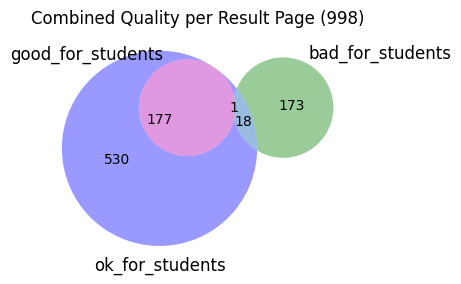

In [240]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

columns = ["good_for_students", "bad_for_students", "ok_for_students"]

plt.figure(figsize=(4, 4))
venn3(
    [set(results_sources[results_sources[column]].index) for column in columns],
    set_labels=columns,
)
plt.title(f"Combined Quality per Result Page ({len(results_sources)})")
plt.show()

In [218]:
results_sources.loc[results_sources["good_for_students"] & results_sources["bad_for_students"]]

Bron: Thumbs up?                                    Titel resultaat  \
401               Ja  Correct gebruik van aanhalingstekens – Correct...   

                                        Link/resultaat  \
401  https://www.correctnederlands.nl/correct-gebru...   

                          Query Relevant? vrije tags page  \
401  wat is een begin aanhaling  relevant             NaN   

               Bronnen DB                  Bron: Inst/Bedrijf  \
401  correctnederlands.nl  Correct Nederlands, Frank den Hond   

    Toegankelijkheid doelgroep (indruk) Soort Resultaat  ...  \
401               redelijk_begrijpelijk     informatief  ...   

    SlimZ Resultaten DB Resultaten: toegankelijkheid Cookie info page  \
401                 NaN                          NaN              NaN   

    More examples Related to Resultaten DB 01 (1) (Bronnen DB) Res: Ranking  \
401           NaN                                          NaN           10   

    Res: soort result  ok_for_students  good_for_students  bad_for_students  
401        informatief            True               True              True  

[1 rows x 61 columns]

In [219]:
results_sources.loc[results_sources["ok_for_students"] & results_sources["bad_for_students"]]

Bron: Thumbs up?                                    Titel resultaat  \
0       Just-in-case                   Schotse - 2 definities - Encyclo   
24      Just-in-case  Het bruist in België: zo viert koning Filip zi...   
34           Twijfel             Fairtrade Max Havelaar - Allesduurzaam   
39      Just-in-case                    Schots - 7 definities - Encyclo   
229     Just-in-case                   Orgaan - 25 definities - Encyclo   
314     Just-in-case                  Trilling - 8 definities - Encyclo   
339     Just-in-case  Nog een mensensoort ontdekt in ons DNA | RTL N...   
351     Just-in-case                       Spiere - definitie - Encyclo   
401               Ja  Correct gebruik van aanhalingstekens – Correct...   
421     Just-in-case  Vertrekhal Schiphol » Alle Info over de Schiph...   
470     Just-in-case                             Autosport | RTL Nieuws   
490     Just-in-case                   Foetus - 22 definities - Encyclo   
615     Just-in-case  Braziliaanse voetballegende Pelé op 82-jarige ...   
660     Just-in-case          Groot Barrièrerif — Google Arts & Culture   
665     Just-in-case                    Galei - 18 definities - Encyclo   
733     Just-in-case                        Prinses Amalia | RTL Nieuws   
844     Just-in-case                    Sloot - 15 definities - Encyclo   
884          Twijfel  Super Grappige En Schattige Paarden Filmpjes |...   
995     Just-in-case                                  Geld | RTL Nieuws   

                                        Link/resultaat  \
0    https://www.encyclo.nl/begrip/schotse#:~:text=...   
24   https://www.rtlnieuws.nl/entertainment/royalty...   
34   https://www.allesduurzaam.nl/keurmerken/keurme...   
39                https://www.encyclo.nl/begrip/schots   
229               https://www.encyclo.nl/begrip/orgaan   
314             https://www.encyclo.nl/begrip/trilling   
339  https://www.rtlnieuws.nl/nieuws/buitenland/art...   
351               https://www.encyclo.nl/begrip/spiere   
401  https://www.correctnederlands.nl/correct-gebru...   
421  https://www.vliegenenparkeren.nl/blog/vertrekh...   
470  https://www.rtlnieuws.nl/tags/onderwerpen/spor...   
490               https://www.encyclo.nl/begrip/foetus   
615  https://www.rtlnieuws.nl/sport/voetbal/artikel...   
660  https://artsandculture.google.com/entity/m0jbx...   
665                https://www.encyclo.nl/begrip/galei   
733  https://www.rtlnieuws.nl/tags/personen/prinses...   
844                https://www.encyclo.nl/begrip/sloot   
884        https://www.youtube.com/watch?v=kqzTVEKqRnM   
995  https://www.rtlnieuws.nl/tags/onderwerpen/econ...   

                                          Query      Relevant?  \
0                          wat betekent schotse       relevant   
24                          koning van belgieje       relevant   
34                                 keurmerk max       relevant   
39                         wat betekent schotse  niet_relevant   
229                            Wat zijn organen       relevant   
314                                    trilling       relevant   
339       welke stammen zijn er in sierra leone       relevant   
351                                      spiere       relevant   
401                  wat is een begin aanhaling       relevant   
421                  vertrekhal met inchekbalie       relevant   
470                                   autosport       relevant   
490                          wat is een foetus?       relevant   
615  braziliaanse voetballegende pele overleden       relevant   
660                         het groot Barrierif       relevant   
665                                       galei       relevant   
733                                      amalia       relevant   
844                                       sloot       relevant   
884                           video van paarden       relevant   
995                                        geld       relevant   

    vrije tags page  

### Vrije Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '41'),
 Text(0, 0, '43'),
 Text(0, 0, '45'),
 Text(0, 0, '47'),
 Text(0, 0, '50'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '62'),
 Text(0, 0, '74'),
 Text(0, 0, '77'),
 Text(0, 0, '81'),
 Text(0, 0, '84'),
 Text(0, 0, '99'),
 Text(0, 0, '132'),
 Text(0, 0

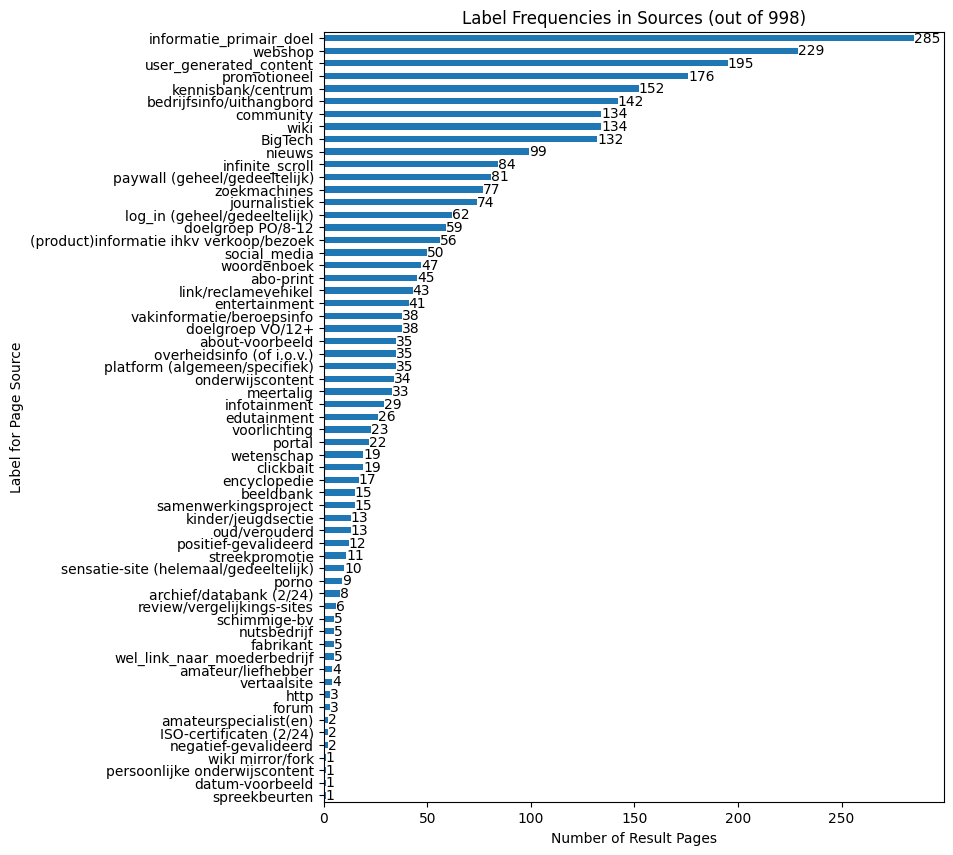

In [138]:
column = "Vrije labels bron/onderwerp"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '41'),
 Text(0, 0, '43'),
 Text(0, 0, '45'),
 Text(0, 0, '47'),
 Text(0, 0, '50'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '62'),
 Text(0, 0, '74'),
 Text(0, 0, '77'),
 Text(0, 0, '81'),
 Text(0, 0, '84'),
 Text(0, 0, '99'),
 Text(0, 0, '132'),
 Text(0, 0, '134'),
 Text(0, 0, '134'),
 Text(0, 0, '142'),
 Text(0, 0, '152'),
 Text(0, 0, '176'),
 Text(0, 0, '195'),
 Text(0, 0, '229'),
 Text(0, 0, '285')]

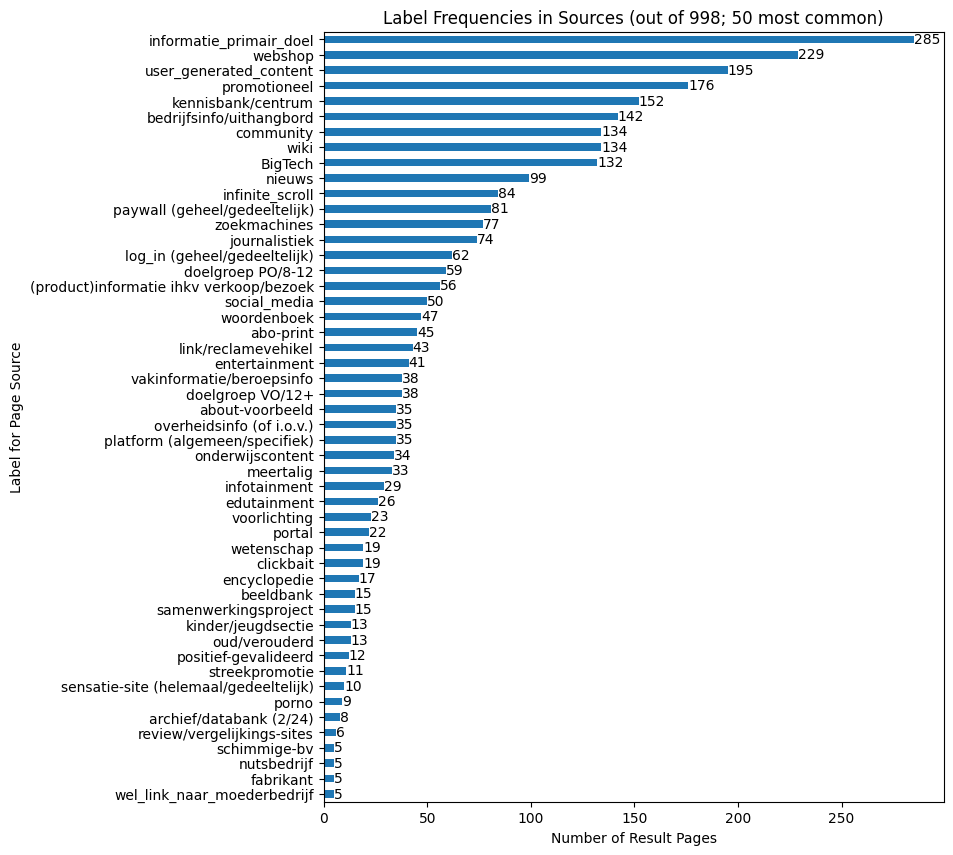

In [139]:
k = 50

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)}; {k} most common)",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '99'),
 Text(0, 0, '132'),
 Text(0, 0, '134'),
 Text(0, 0, '134'),
 Text(0, 0, '142'),
 Text(0, 0, '152'),
 Text(0, 0, '176'),
 Text(0, 0, '195'),
 Text(0, 0, '229'),
 Text(0, 0, '285')]

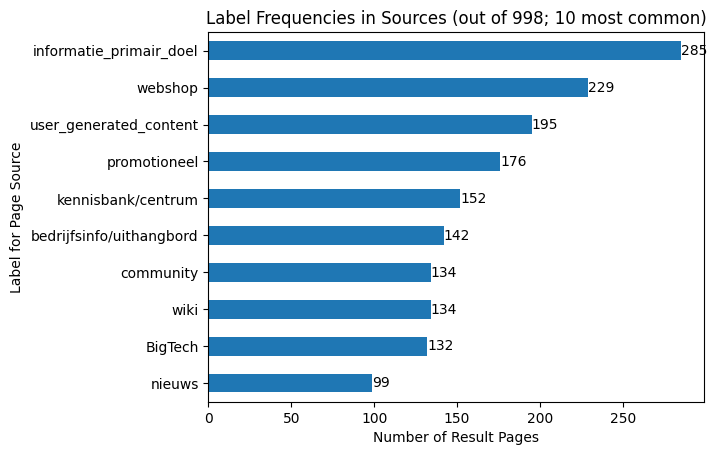

In [140]:
k = 10

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)}; {k} most common)",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
    )
)

ax.bar_label(ax.containers[0])

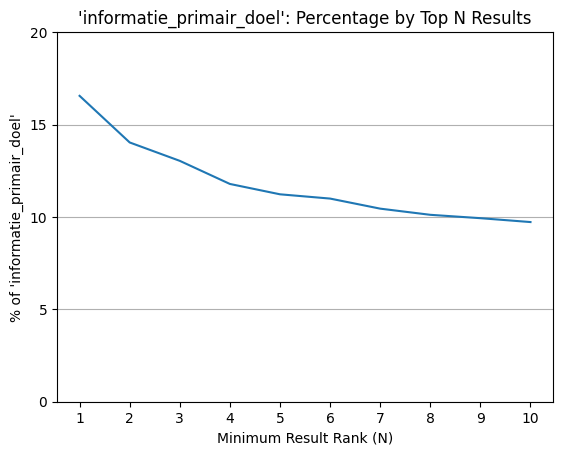

In [141]:
counts: dict[int, float] = {}
category = "informatie_primair_doel"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 25, 5),
    legend=False,
).grid(axis="y")

### Result Sources

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0

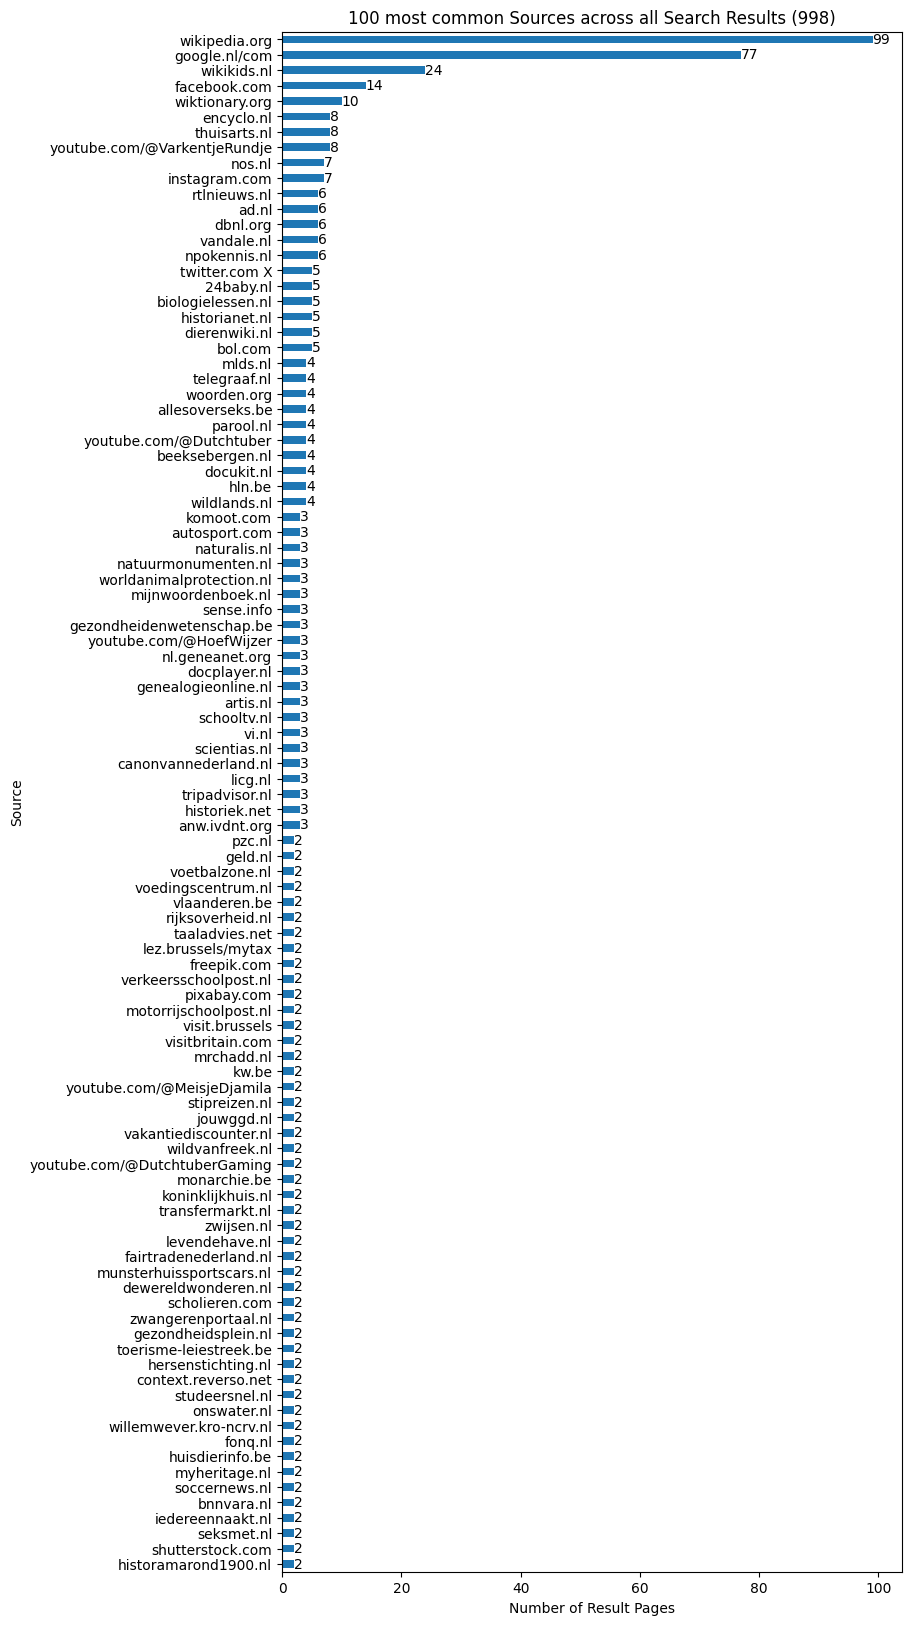

In [142]:
k = 100

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '77'),
 Text(0, 0, '99')]

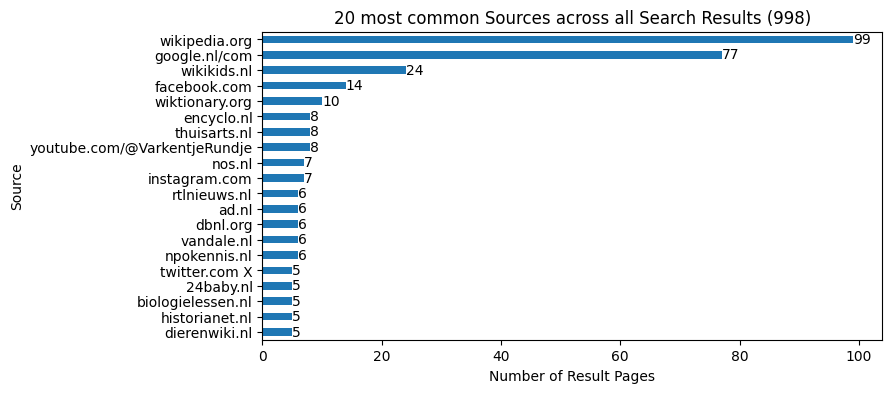

In [143]:
k = 20

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '77'),
 Text(0, 0, '99')]

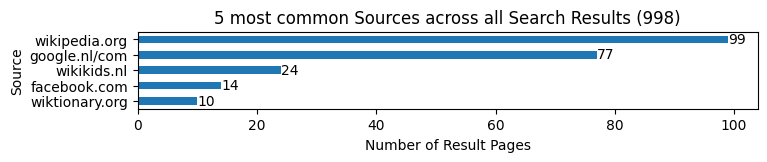

In [144]:
k = 5

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '53'),
 Text(0, 0, '83')]

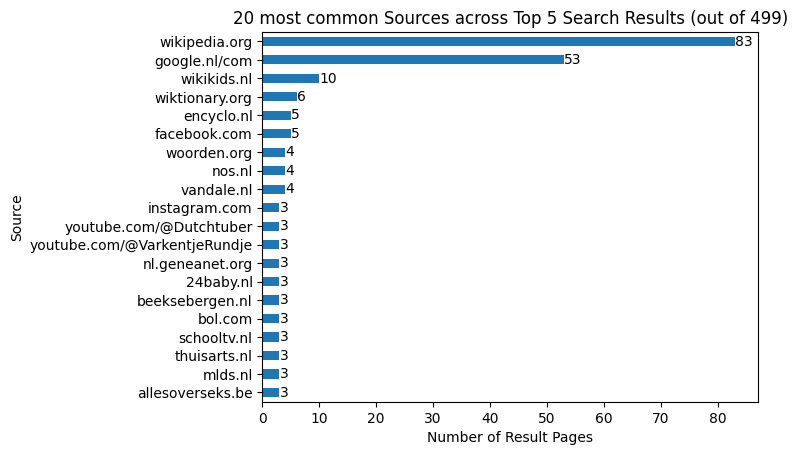

In [145]:
n = 5
_results = results.loc[results["Ranking"] <= n]
k = 20

ax = (
    _results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        # figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '37')]

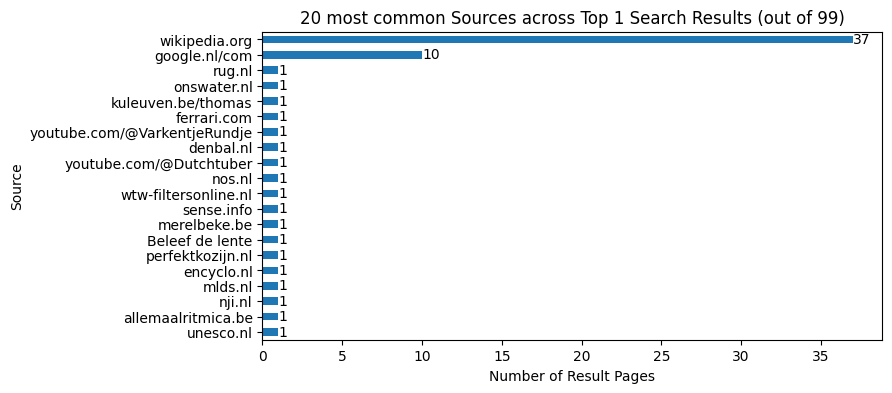

In [146]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 20

ax = (
    _results["Bronnen DB"]
    .value_counts()[:k]
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '37')]

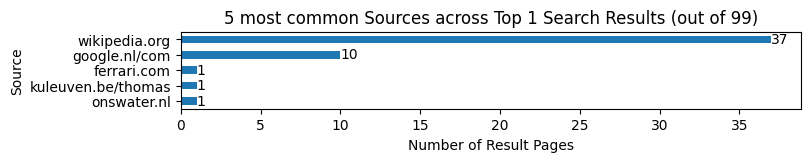

In [147]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 5

ax = (
    _results["Bronnen DB"]
    .value_counts()[:k]
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

In [148]:
# wikikids.nl results never appears on first rank:

results.loc[(results["Bronnen DB"] == ("wikikids.nl")) & (results["Ranking"] <= 1)]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Link/resultaat, Query, Relevant?, vrije tags page, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Soort Resultaat, Bron: Vrije labels, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Q: Ranking vrije labels, Bron: doel, Bron: Trackers, OnderzoekNr, Ranking, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, Query: Video Schooltv, Created by, Bron-Status, Bron: Onderwerp]
Index: []

[0 rows x 27 columns]

[Text(0, 0, '1'), Text(0, 0, '11'), Text(0, 0, '23'), Text(0, 0, '27')]

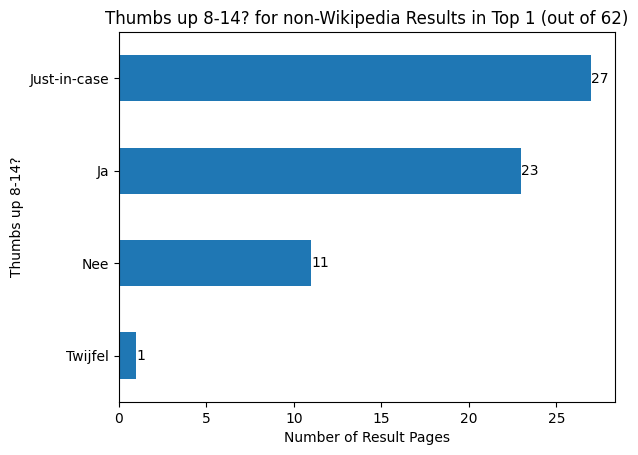

In [149]:
niet_wikipedia_rank_1 = results_sources.loc[
    (results["Bronnen DB"] != ("wikipedia.org")) & (results["Ranking"] <= 1)
]
ax = (
    niet_wikipedia_rank_1["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs up 8-14? for non-Wikipedia Results in Top 1 (out of {len(niet_wikipedia_rank_1)})",
        xlabel="Number of Result Pages",
    )
)
ax.bar_label(ax.containers[0])

### Result Types (Informativeness)

In [150]:
column = "Soort Resultaat"

values = results_sources[column].unique()

counts = (
    results_sources.groupby("Query")
    .value_counts(subset=[column], normalize=True)
    .unstack(level=column)
)

counts

Soort Resultaat                             informatief  navigational  \
Query                                                                   
De gouverneur van limburg                      0.900000      0.100000   
De smurfen                                     0.200000      0.400000   
Dierentuin                                     1.000000           NaN   
Ezel                                           0.700000           NaN   
Hoe komen straatkinderen aan eten              1.000000           NaN   
...                                                 ...           ...   
welken gebouwen zijn er in West-Vlaanderen     0.800000      0.200000   
westerschelde waternoodsramp                   0.900000      0.100000   
wist je dat?                                   1.000000           NaN   
zebra                                          0.636364      0.272727   
zebrahaai                                      0.600000      0.300000   

Soort Resultaat                             transactional  
Query                                                      
De gouverneur van limburg                             NaN  
De smurfen                                       0.400000  
Dierentuin                                            NaN  
Ezel                                             0.300000  
Hoe komen straatkinderen aan eten                     NaN  
...                                                   ...  
welken gebouwen zijn er in West-Vlaanderen            NaN  
westerschelde waternoodsramp                          NaN  
wist je dat?                                          NaN  
zebra                                            0.090909  
zebrahaai                                        0.100000  

[100 rows x 3 columns]

In [151]:
width = 120

for col in counts.columns:
    print("=" * 20 + col + "=" * 20)
    with pd.option_context("display.width", width, "display.min_rows", 50):
        print(counts.sort_values(by=col, ascending=False))
    print("=" * width)

====================informatief====================
Soort Resultaat                                     informatief  navigational  transactional
Query                                                                                       
mens red peuter van dak racist                         1.000000           NaN            NaN
wist je dat?                                           1.000000           NaN            NaN
waar leven giraffen                                    1.000000           NaN            NaN
wat betekent schotse                                   1.000000           NaN            NaN
wat is een begin aanhaling                             1.000000           NaN            NaN
elektronen                                             1.000000           NaN            NaN
ik wil iemand een bericht steuren                      1.000000           NaN            NaN
wat is een foetus?                                     1.000000           NaN            NaN
voortplanting     

[Text(0, 0, '138'), Text(0, 0, '181'), Text(0, 0, '679')]

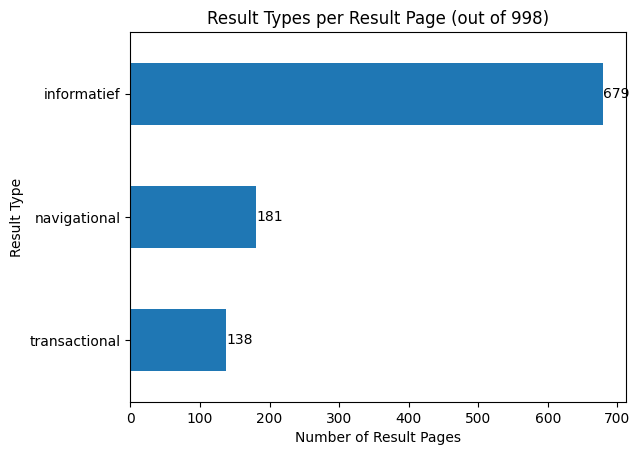

In [152]:
column = "Soort Resultaat"

ax = (
    results[column]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Result Types per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Result Type",
    )
)
ax.bar_label(ax.containers[0])

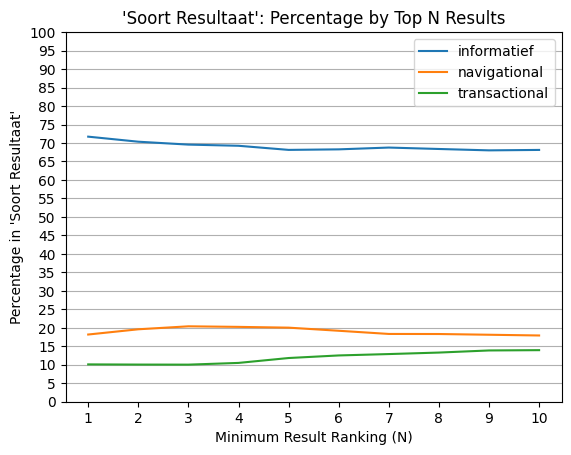

In [153]:
value_counts: dict = {}


for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 105, 5),
    legend=True,
).grid(axis="y")

### Result Relevance

[Text(0, 0, '1'), Text(0, 0, '53'), Text(0, 0, '117'), Text(0, 0, '827')]

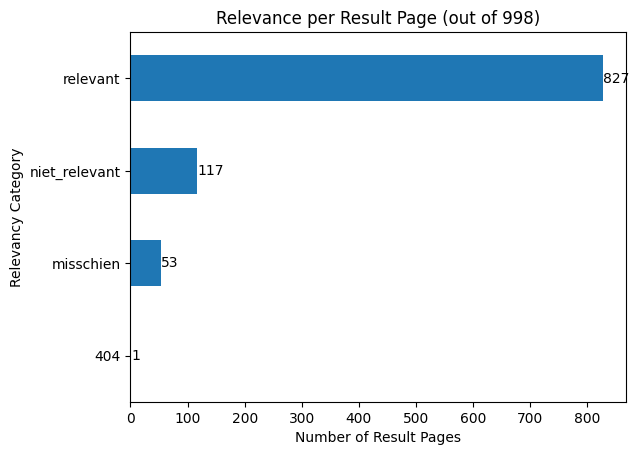

In [154]:
ax = (
    results["Relevant?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Relevance per Result Page (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Relevancy Category",
    )
)
ax.bar_label(ax.containers[0])

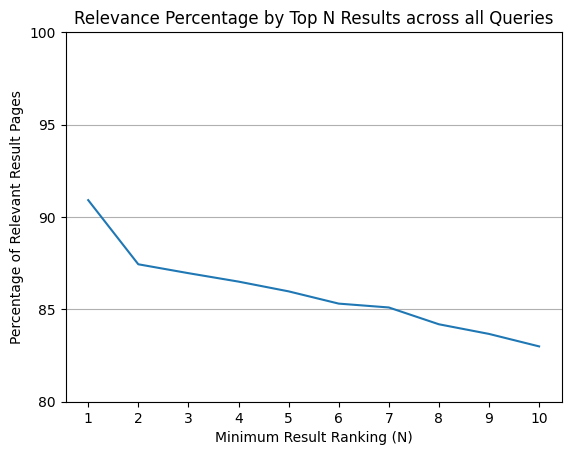

In [155]:
counts: dict[int, float] = {}

for n in range(1, 11):
    _results = results.loc[results["Ranking"] <= n]
    counts[n] = _results["Relevant?"].value_counts(normalize=True)["relevant"] * 100

pd.DataFrame(counts.items(), columns=["Ranking", "Relevance"]).set_index(
    "Ranking"
).plot(
    title="Relevance Percentage by Top N Results across all Queries",
    xlabel="Minimum Result Ranking (N)",
    ylabel="Percentage of Relevant Result Pages",
    xticks=range(1, 11),
    yticks=range(80, 105, 5),
    legend=False,
).grid(axis="y")

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/1192633478.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


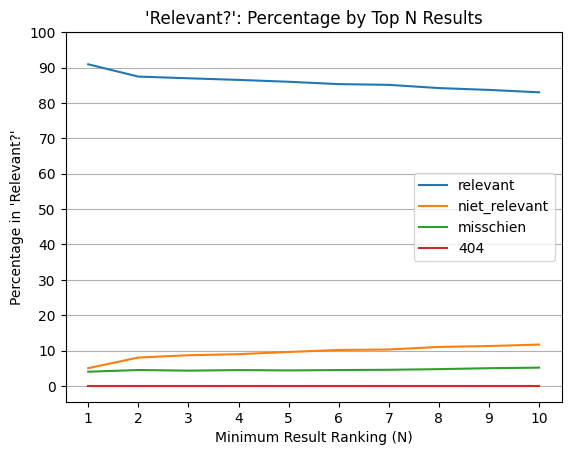

In [156]:
value_counts: dict = {}

column = "Relevant?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[:k]
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="bfill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 101, 10),
    legend=True,
).grid(axis="y")

### Result Accessibility

[Text(0, 0, '10'),
 Text(0, 0, '55'),
 Text(0, 0, '300'),
 Text(0, 0, '302'),
 Text(0, 0, '331')]

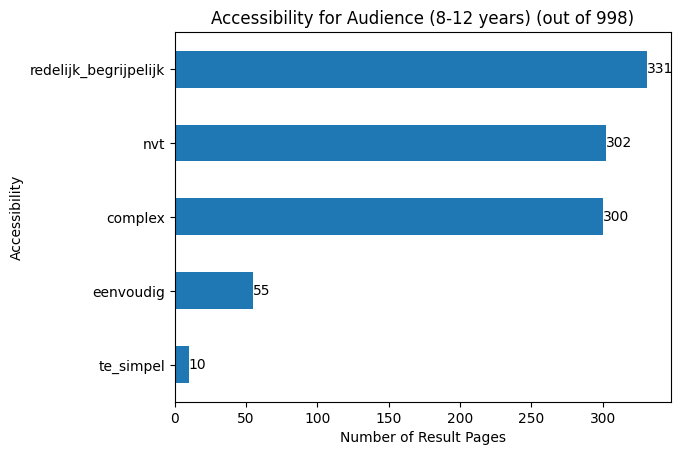

In [157]:
ax = (
    results["Toegankelijkheid doelgroep (indruk)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Accessibility for Audience (8-12 years) (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Accessibility",
    )
)
ax.bar_label(ax.containers[0])

### Results Commerciality

[Text(0, 0, '53'), Text(0, 0, '416'), Text(0, 0, '528')]

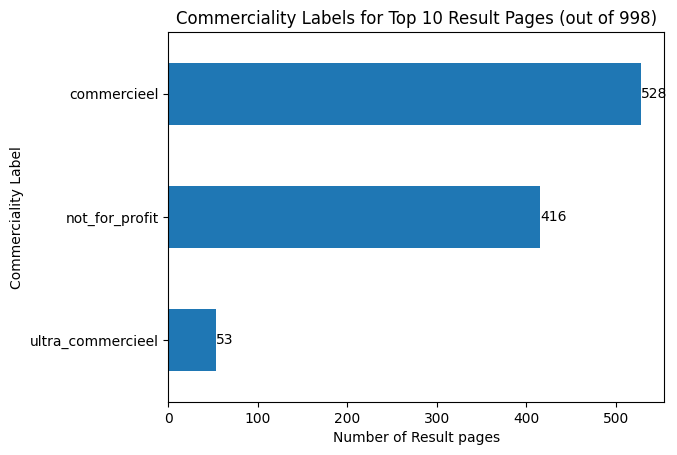

In [158]:
n=10

ax = (
    results_sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(results_sources)})",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '18'), Text(0, 0, '228'), Text(0, 0, '252')]

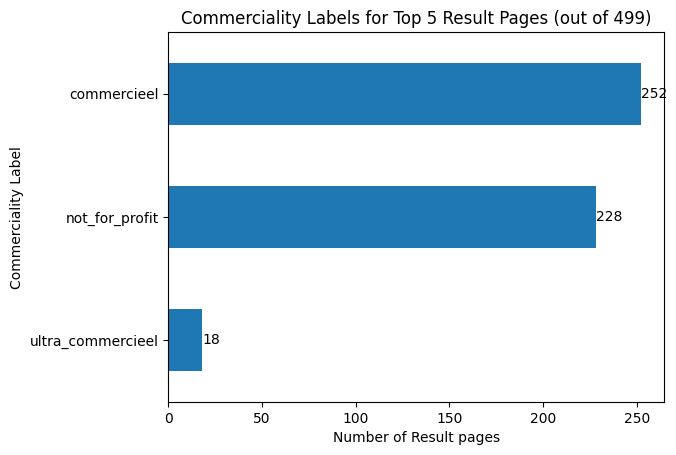

In [159]:
n = 5
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)})",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'), Text(0, 0, '36'), Text(0, 0, '62')]

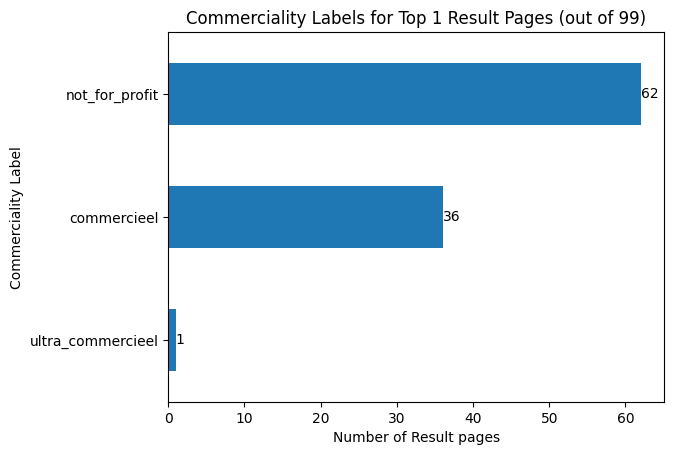

In [160]:
n = 1
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)})",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

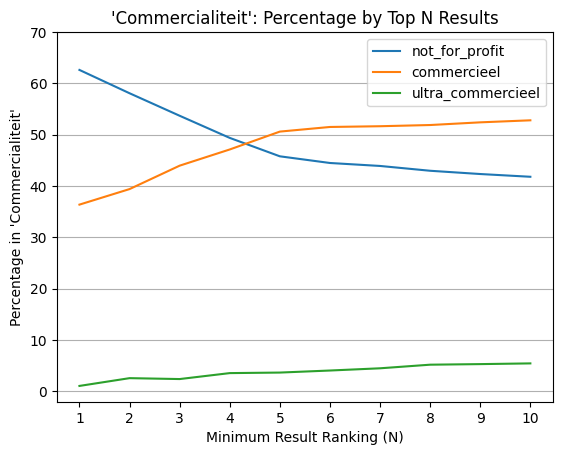

In [161]:
value_counts: dict = {}
column = "Commercialiteit"


for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(0).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 75, 10),
    legend=True,
).grid(axis="y")

### Result Sectors

[Text(0, 0, '9'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '33'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '69'),
 Text(0, 0, '76'),
 Text(0, 0, '95'),
 Text(0, 0, '106'),
 Text(0, 0, '140'),
 Text(0, 0, '165')]

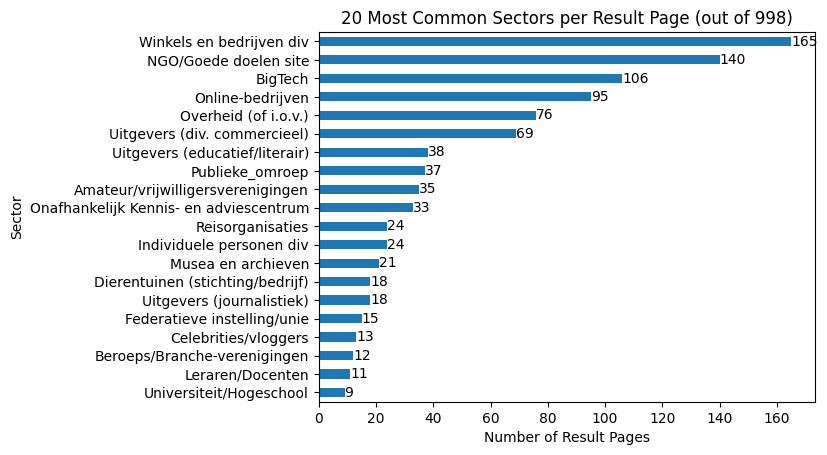

In [162]:
k = 20

ax = (
    results_sources["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} Most Common Sectors per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '31'),
 Text(0, 0, '31'),
 Text(0, 0, '40'),
 Text(0, 0, '63'),
 Text(0, 0, '72'),
 Text(0, 0, '106')]

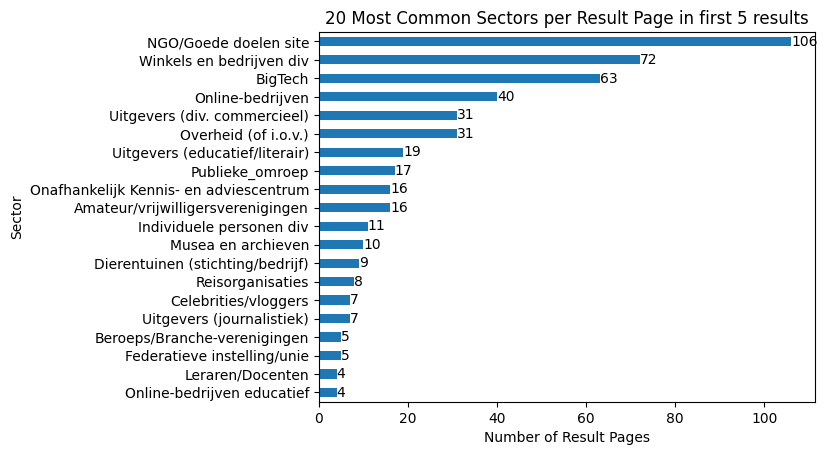

In [163]:
n = 5
k = 20
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} Most Common Sectors per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '41')]

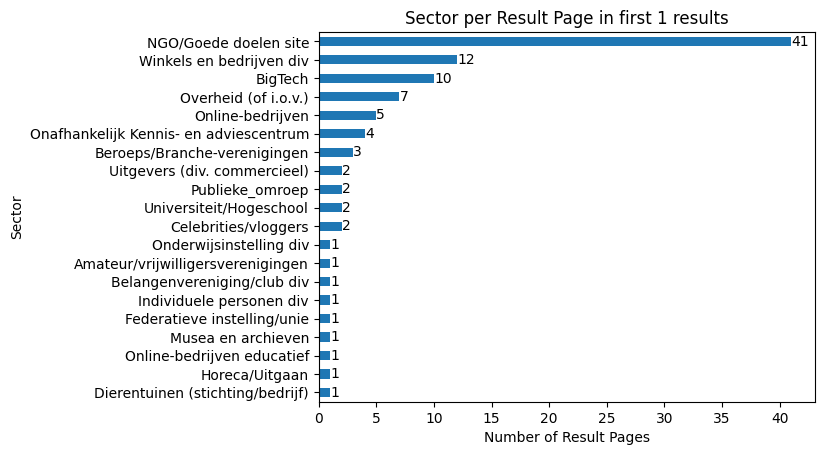

In [164]:
n = 1
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/978984602.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


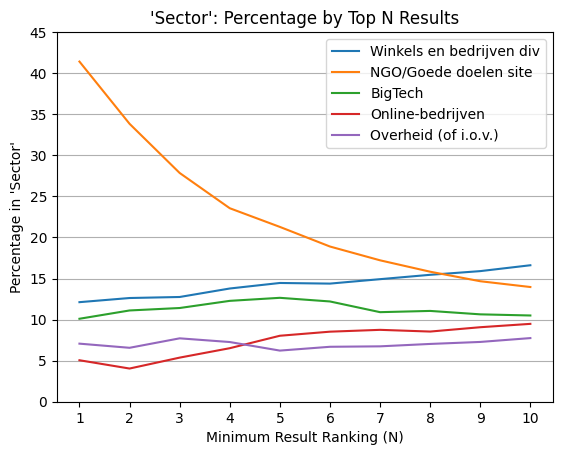

In [165]:
value_counts: dict = {}
k = 5
column = "Sector"

top_sectors = results_sources[column].value_counts()[:k].index

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[top_sectors]
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="ffill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=True,
).grid(axis="y")

### Thumbs-Up

[Text(0, 0, '25'), Text(0, 0, '232'), Text(0, 0, '359'), Text(0, 0, '381')]

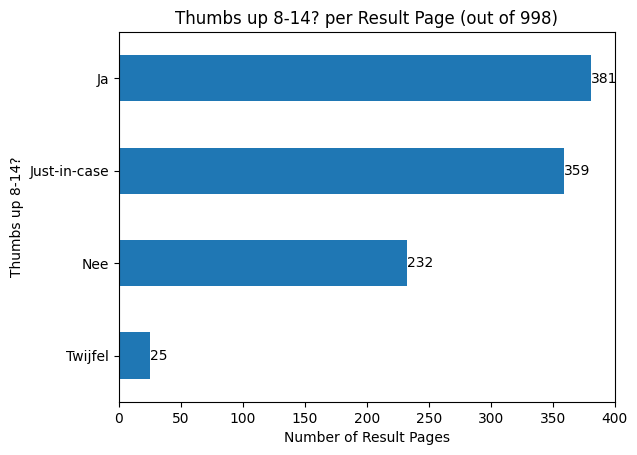

In [166]:
column = "Thumbs up 8-14?"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '7'), Text(0, 0, '99'), Text(0, 0, '178'), Text(0, 0, '214')]

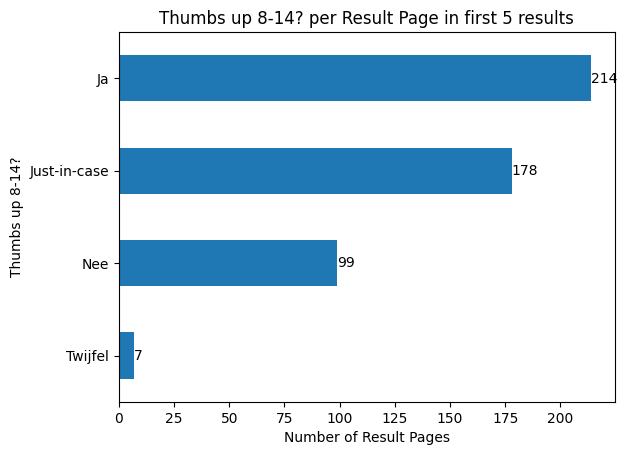

In [167]:
column = "Thumbs up 8-14?"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'), Text(0, 0, '11'), Text(0, 0, '27'), Text(0, 0, '60')]

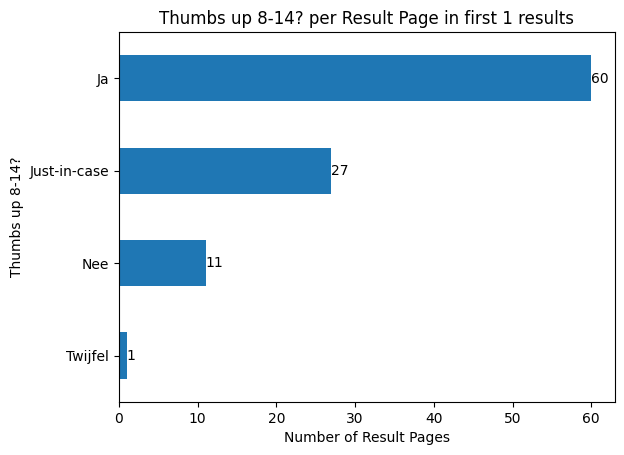

In [168]:
column = "Thumbs up 8-14?"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

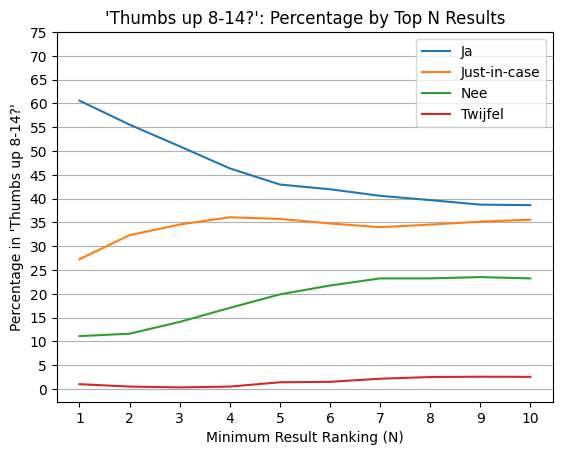

In [169]:
value_counts: dict = {}

categories = ["Ja", "Just-in-case"]
column = "Thumbs up 8-14?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 80, 5),
    legend=True,
).grid(axis="y")

### Goal

[Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '22'),
 Text(0, 0, '22'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '37'),
 Text(0, 0, '48'),
 Text(0, 0, '60'),
 Text(0, 0, '63'),
 Text(0, 0, '94'),
 Text(0, 0, '110'),
 Text(0, 0, '111'),
 Text(0, 0, '216')]

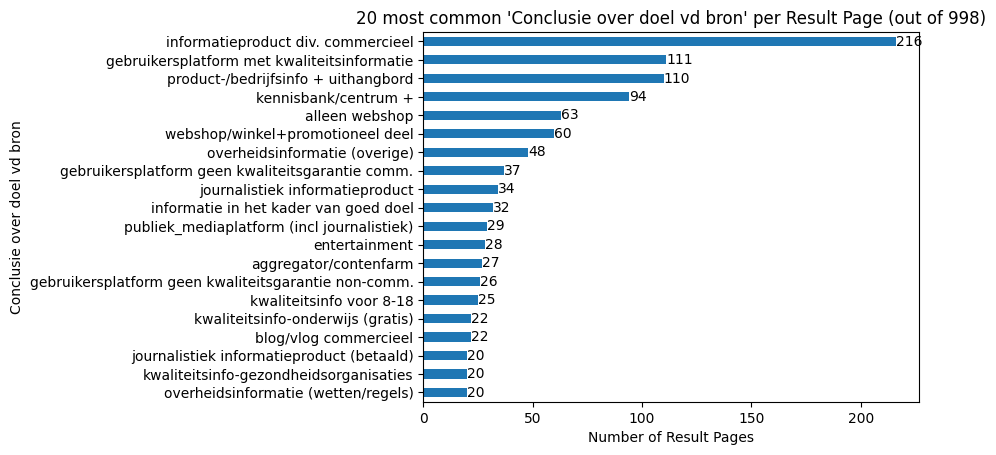

In [170]:
column = "Conclusie over doel vd bron"
k = 20

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most common '{column}' per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '28'),
 Text(0, 0, '39'),
 Text(0, 0, '49'),
 Text(0, 0, '89'),
 Text(0, 0, '112')]

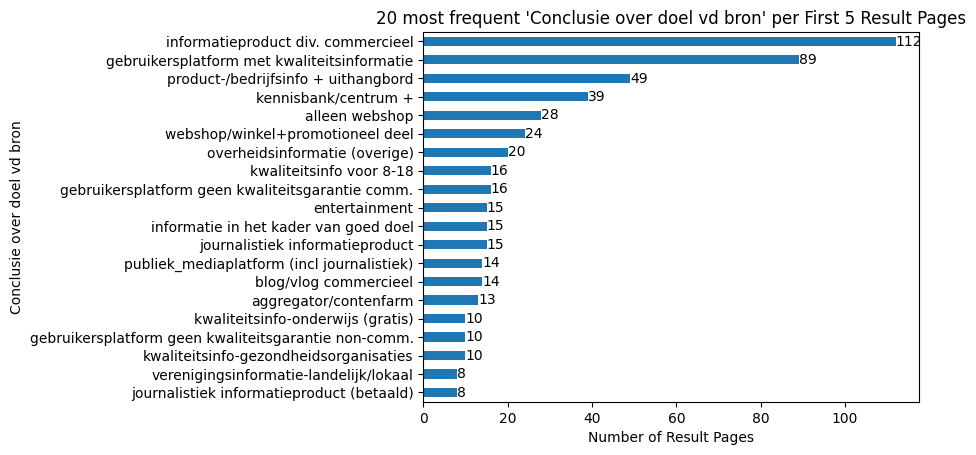

In [171]:
column = "Conclusie over doel vd bron"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most frequent '{column}' per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '17'),
 Text(0, 0, '37')]

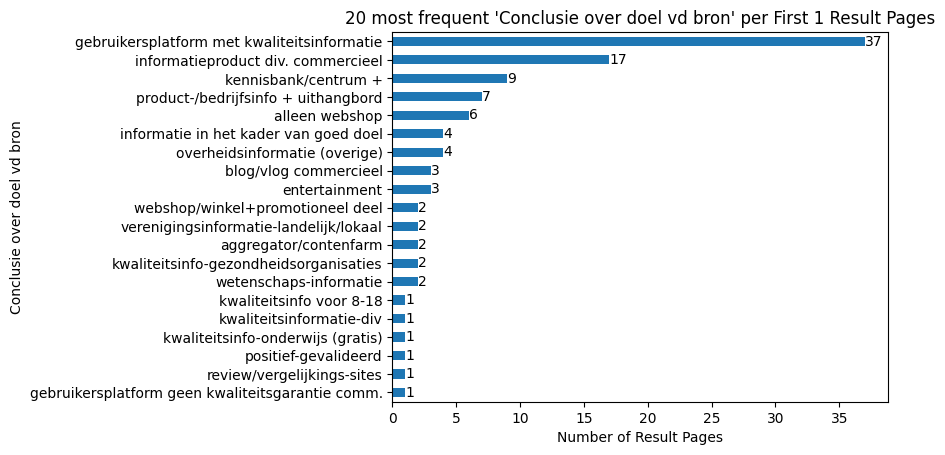

In [172]:
column = "Conclusie over doel vd bron"
n = 1
k = 20

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most frequent '{column}' per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        # figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

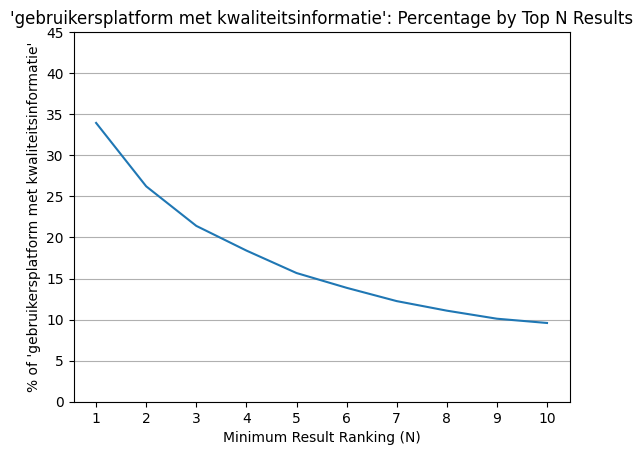

In [173]:
counts: dict[int, float] = {}
category = "gebruikersplatform met kwaliteitsinformatie"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", "Thumbs Up"]).set_index(
    "Ranking"
).plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=False,
).grid(axis="y")

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '21'),
 Text(0, 0, '27'),
 Text(0, 0, '53'),
 Text(0, 0, '125'),
 Text(0, 0, '331'),
 Text(0, 0, '423')]

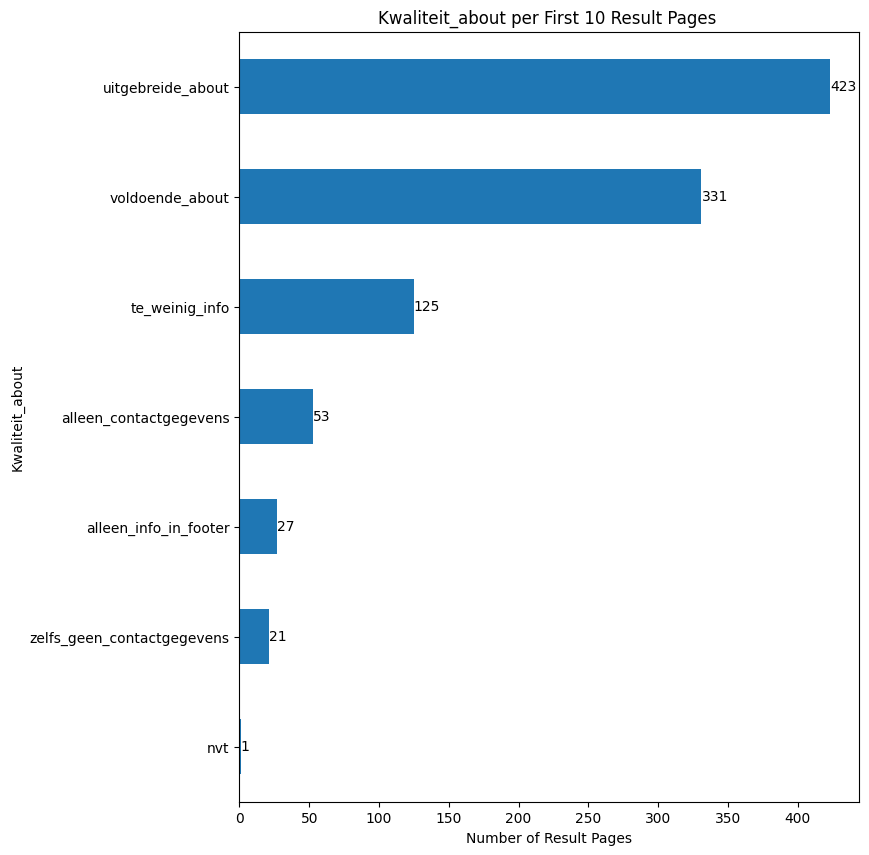

In [174]:
column = "Kwaliteit_about"
n = 10

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages ",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Ads

In [175]:
column = "Reclame"
n = 5

categories = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-n:]
).index
categories

Index(['over_the_top_ads', 'limited_ads', 'many_ads', 'none',
       'company_promotion'],
      dtype='object', name='Reclame')

[Text(0, 0, '39'),
 Text(0, 0, '76'),
 Text(0, 0, '199'),
 Text(0, 0, '357'),
 Text(0, 0, '389')]

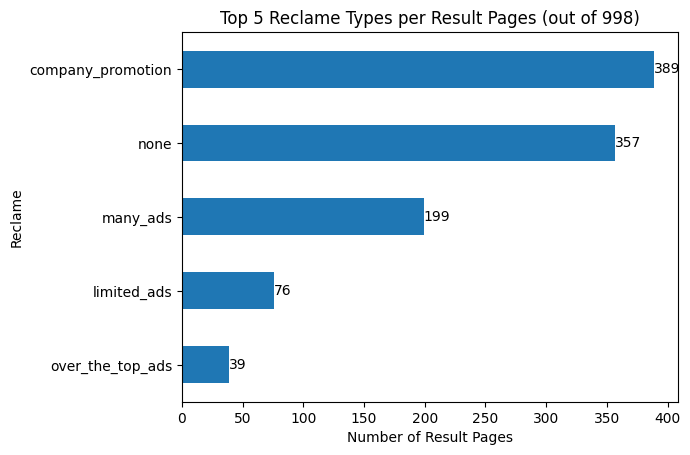

In [176]:
ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[categories]
    .plot(
        kind="barh",
        title=f"Top {n} {column} Types per Result Pages (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/331480954.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


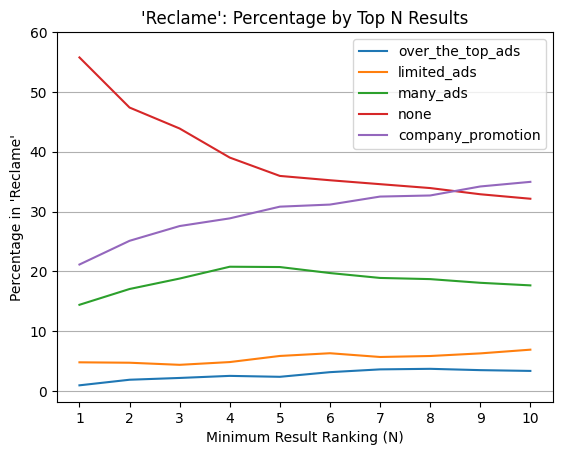

In [177]:
column = "Reclame"
n = 5

value_counts: dict = {}


for rank in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= rank]
    value_counts[rank] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[categories]
        * 100
    )

pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="bfill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 61, 10),
    legend=True,
).grid(axis="y")

[Text(0, 0, '1'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '32'),
 Text(0, 0, '113'),
 Text(0, 0, '168'),
 Text(0, 0, '196')]

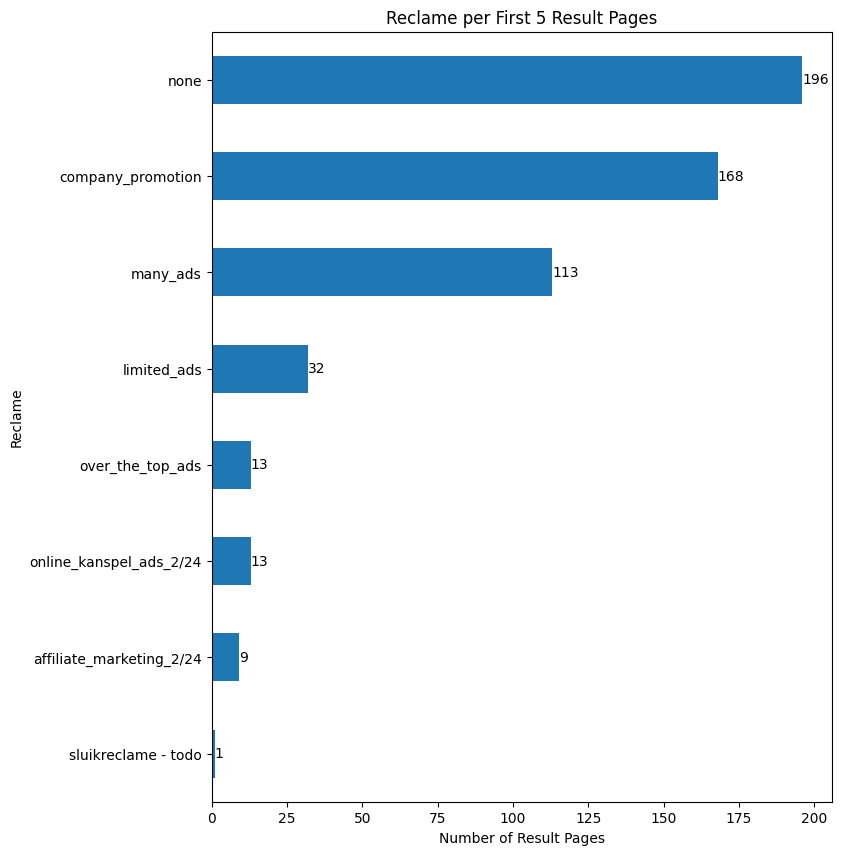

In [178]:
column = "Reclame"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '15'),
 Text(0, 0, '22'),
 Text(0, 0, '58')]

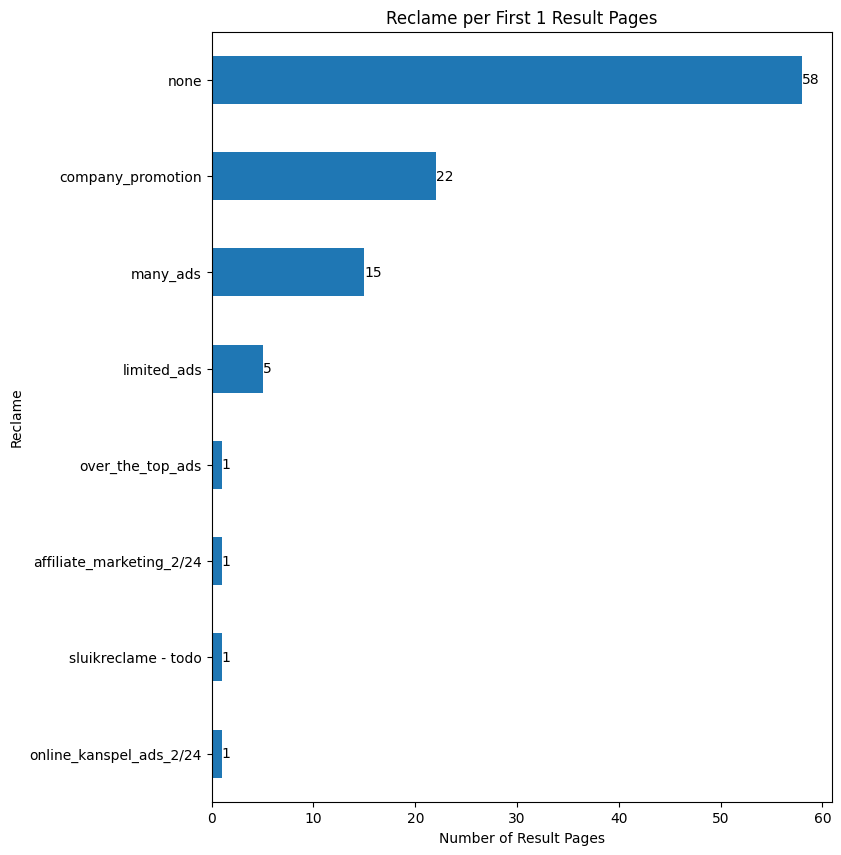

In [179]:
column = "Reclame"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

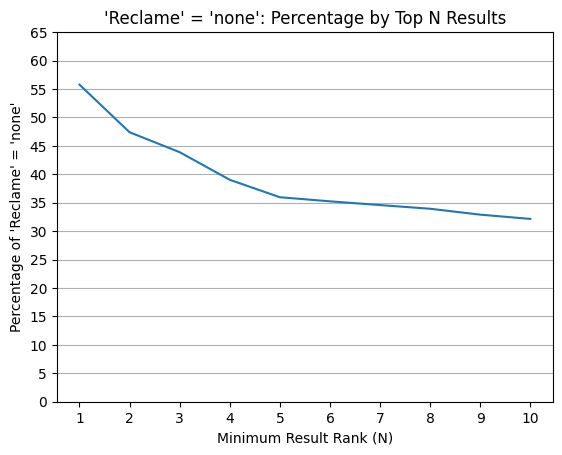

In [180]:
counts: dict[int, float] = {}
category = "none"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{column}' = '{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"Percentage of '{column}' = '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 70, 5),
    legend=False,
).grid(axis="y")

## Sources

### Commerciality

[Text(0, 0, '17'), Text(0, 0, '197'), Text(0, 0, '328')]

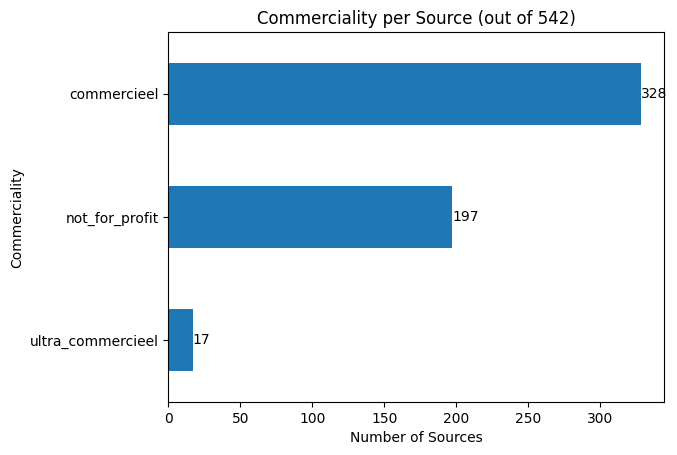

In [181]:
ax = (
    sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Commerciality",
    )
)
ax.bar_label(ax.containers[0])

### Sectors

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '19'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '32'),
 Text(0, 0, '35'),
 Text(0, 0, '56'),
 Text(0, 0, '67'),
 Text(0, 0, '144')]

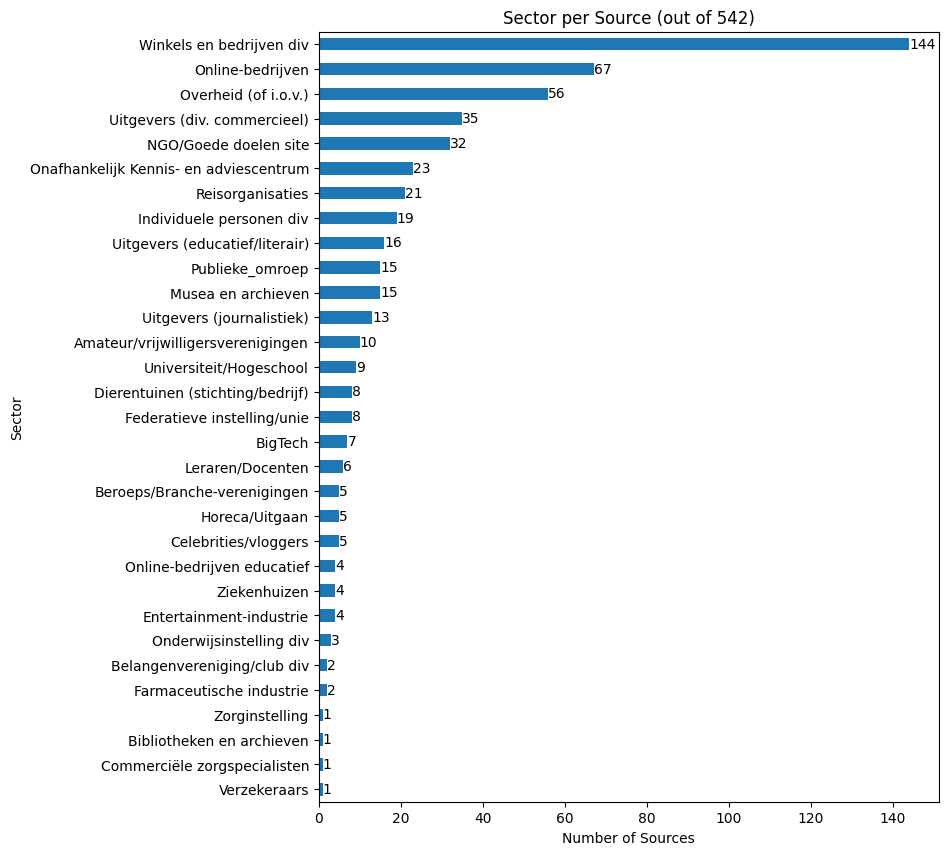

In [182]:
ax = (
    sources["Sector"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Sector",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Free Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 

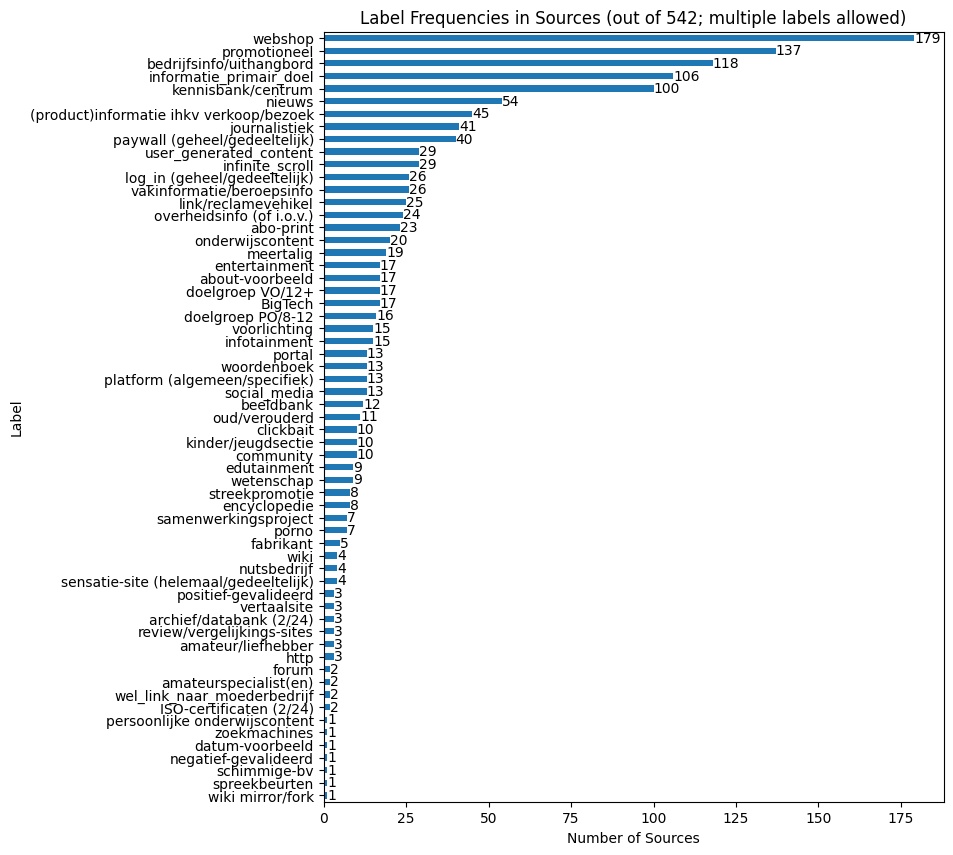

In [183]:
ax = (
    sources["Vrije labels bron/onderwerp"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(sources)}; multiple labels allowed)",
        xlabel="Number of Sources",
        ylabel="Label",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Trackers

<Axes: title={'center': 'Number of Blocked Trackers per Source (out of 542)'}, xlabel='Number of Sources', ylabel='Number of Blocked Trackers'>

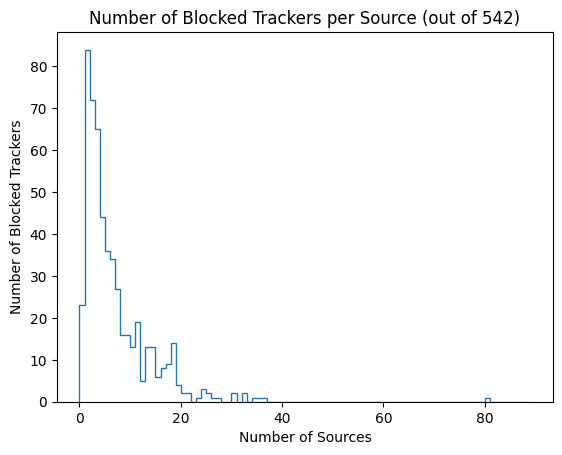

In [184]:
sources["uBlocked trackers"].plot(
    kind="hist",
    histtype="step",
    bins=range(0, 90),
    title=f"Number of Blocked Trackers per Source (out of {len(sources)})",
    ylabel="Number of Blocked Trackers",
    xlabel="Number of Sources",
)

### Ads

[Text(0, 0, '18'),
 Text(0, 0, '288'),
 Text(0, 0, '43'),
 Text(0, 0, '57'),
 Text(0, 0, '162'),
 Text(0, 0, '7'),
 Text(0, 0, '20'),
 Text(0, 0, '6')]

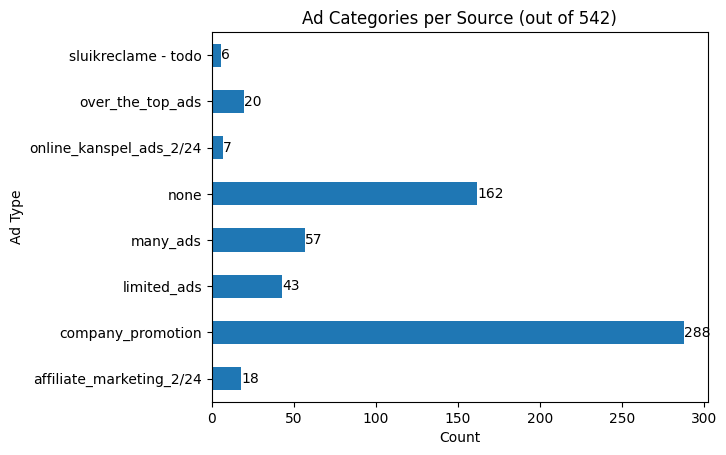

In [185]:
ax = (
    sources["Reclame"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Ad Categories per Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Ad Type",
    )
)
ax.bar_label(ax.containers[0])

### Goal of Source

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '25'),
 Text(0, 0, '38'),
 Text(0, 0, '54'),
 Text(0, 0, '56'),
 Text(0, 0, '64'),
 Text(0, 0, '82'),
 Text(0, 0, '94')]

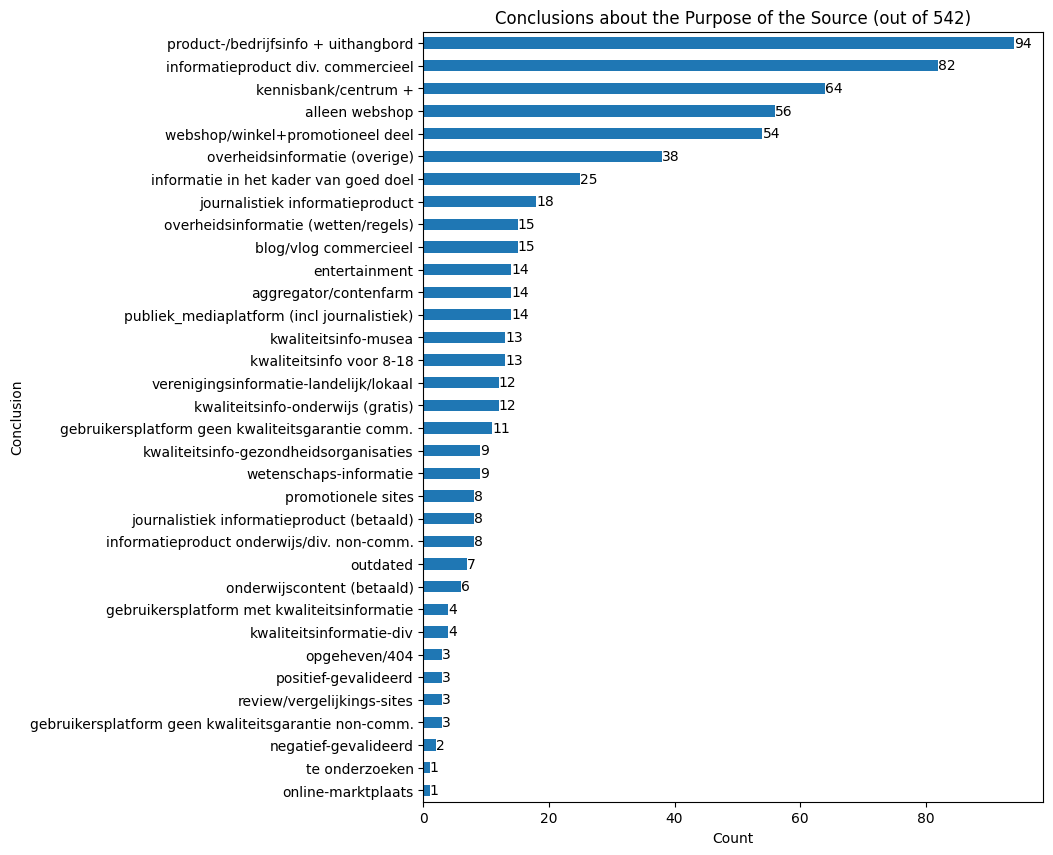

In [186]:
ax = (
    sources["Conclusie over doel vd bron"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Conclusions about the Purpose of the Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Conclusion",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Source: Thumbs-Up

[Text(0, 0, '19'), Text(0, 0, '166'), Text(0, 0, '176'), Text(0, 0, '181')]

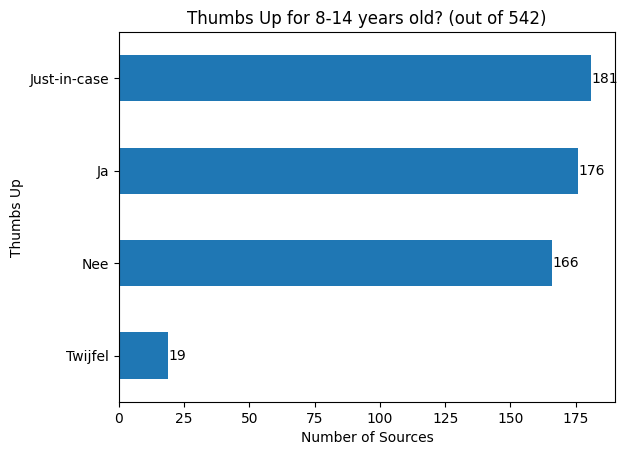

In [187]:
ax = (
    sources["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs Up for 8-14 years old? (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Thumbs Up",
    )
)
ax.bar_label(ax.containers[0])

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '35'),
 Text(0, 0, '63'),
 Text(0, 0, '204'),
 Text(0, 0, '214')]

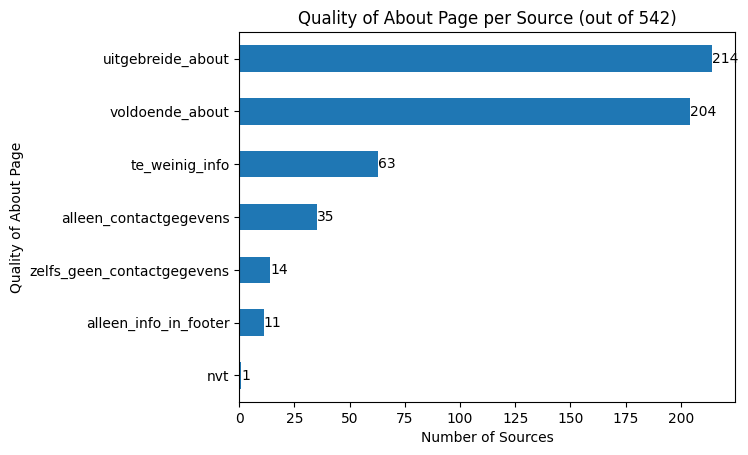

In [188]:
ax = (
    sources["Kwaliteit_about"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Quality of About Page per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Quality of About Page",
    )
)
ax.bar_label(ax.containers[0])

### Doelgroep vs. Thumbs-Up

In [189]:
doelgroep_po = sources.loc[
    (sources["Vrije labels bron/onderwerp"].notna())
    & (sources["Vrije labels bron/onderwerp"].str.contains("doelgroep PO/8-12"))
]
doelgroep_po

URL Domein  \
Name                                                                      
canonvannederland.nl                  https://www.canonvannederland.nl/   
dierenwiki.nl                                    https://dierenwiki.nl/   
dierpedia.nl                                      https://dierpedia.nl/   
docukit.nl                                      https://www.docukit.nl/   
natgeojunior.nl                             https://www.natgeojunior.nl   
rangerclub.be                                     https://rangerclub.be   
rangers.wwf.nl                                  https://rangers.wwf.nl/   
schoolsupport.nl                               https://schoolsupport.nl   
schooltv.nl                                        https://schooltv.nl/   
superspreekbeurt.nl                         https://superspreekbeurt.nl   
taal-oefenen.nl                             https://www.taal-oefenen.nl   
weetwatjeviert.nl                            https://weetwatjeviert.nl/   
wikikids.nl                                        https://wikikids.nl/   
wildvanfreek.nl                             https://www.wildvanfreek.nl   
willemwever.kro-ncrv.nl                https://willemwever.kro-ncrv.nl/   
youtube.com/@VarkentjeRundje  https://www.youtube.com/@VarkentjeRundje/   

                                                    Conclusie over doel vd bron  \
Name                                                                              
canonvannederland.nl                          kwaliteitsinfo-onderwijs (gratis)   
dierenwiki.nl                                             aggregator/contenfarm   
dierpedia.nl                  aggregator/contenfarm, informatieproduct div. ...   
docukit.nl                                             kwaliteitsinfo voor 8-18   
natgeojunior.nl                                        kwaliteitsinfo voor 8-18   
rangerclub.be                                          kwaliteitsinfo voor 8-18   
rangers.wwf.nl                informatie in het kader van goed doel, kwalite...   
schoolsupport.nl                                       kwaliteitsinfo voor 8-18   
schooltv.nl                   kwaliteitsinfo voor 8-18, publiek_mediaplatfor...   
superspreekbeurt.nl                                       aggregator/contenfarm   
taal-oefenen.nl               kwaliteitsinfo-onderwijs (gratis), onderwijsco...   
weetwatjeviert.nl                kennisbank/centrum +, kwaliteitsinfo voor 8-18   
wikikids.nl                   gebruikersplatform geen kwaliteitsgarantie non...   
wildvanfreek.nl                                        kwaliteitsinfo voor 8-18   
willemwever.kro-ncrv.nl       kwaliteitsinfo voor 8-18, publiek_mediaplatfor...   
youtube.com/@VarkentjeRundje                                      entertainment   

                             Thumbs up 8-14?  \
Name                                           
canonvannederland.nl                      Ja   
dierenwiki.nl                            Nee   
dierpedia.nl                             Nee   
docukit.nl                                Ja   
natgeojunior.nl                           Ja   
rangerclub.be                             Ja   
rangers.wwf.nl                            Ja   
schoolsupport.nl                          Ja   
schooltv.nl                               Ja   
superspreekbeurt.nl                      Nee   
taal-oefenen.nl                           Ja   
weetwatjeviert.nl                         Ja   
wikikids.nl                              Nee   
wildvanfreek.nl                           Ja   
willemwever.kro-ncrv.nl                   Ja   
youtube.com/@VarkentjeRundje    Just-in-case   

                                                         Sector  \
Name                                                              
canonvannederland.nl                         Musea en archieven   
dierenwiki.nl                                  Online-bedrijven   
dierpedia.nl                                   Online-bedrijven   
docukit.nl     

In [190]:
doelgroep_vo = sources.loc[
    (sources["Vrije labels bron/onderwerp"].notna())
    & (sources["Vrije labels bron/onderwerp"].str.contains("doelgroep VO/12+"))
]
doelgroep_vo

URL Domein  \
Name                                                                 
aljevragen.nl                            https://www.aljevragen.nl   
allesoverseks.be                     https://www.allesoverseks.be/   
biologielessen.nl                       https://biologielessen.nl/   
canonvannederland.nl             https://www.canonvannederland.nl/   
cyberpoli.nl                             https://www.cyberpoli.nl/   
dierenwiki.nl                               https://dierenwiki.nl/   
dierpedia.nl                                 https://dierpedia.nl/   
examenoverzicht.nl                 https://www.examenoverzicht.nl/   
jouwggd.nl                                 https://www.jouwggd.nl/   
mlochemie.nl                              https://www.mlochemie.nl   
mrchadd.nl                                 https://www.mrchadd.nl/   
schooltv.nl                                   https://schooltv.nl/   
seksualiteit.nl                            https://seksualiteit.nl   
sense.info                                      https://sense.info   
surinamewebquest.nl                http://www.surinamewebquest.nl/   
wetenschapsschool.nl             https://www.wetenschapsschool.nl/   
youtube.com/@WouterRenkema  https://www.youtube.com/@WouterRenkema   

                                                  Conclusie over doel vd bron  \
Name                                                                            
aljevragen.nl                              informatieproduct div. commercieel   
allesoverseks.be                                     kwaliteitsinfo voor 8-18   
biologielessen.nl                           kwaliteitsinfo-onderwijs (gratis)   
canonvannederland.nl                        kwaliteitsinfo-onderwijs (gratis)   
cyberpoli.nl                                         kwaliteitsinfo voor 8-18   
dierenwiki.nl                                           aggregator/contenfarm   
dierpedia.nl                aggregator/contenfarm, informatieproduct div. ...   
examenoverzicht.nl                                 onderwijscontent (betaald)   
jouwggd.nl                             kwaliteitsinfo-gezondheidsorganisaties   
mlochemie.nl                                kwaliteitsinfo-onderwijs (gratis)   
mrchadd.nl                  kwaliteitsinfo-onderwijs (gratis), onderwijsco...   
schooltv.nl                 kwaliteitsinfo voor 8-18, publiek_mediaplatfor...   
seksualiteit.nl             informatie in het kader van goed doel, kennisb...   
sense.info                                           kwaliteitsinfo voor 8-18   
surinamewebquest.nl                         kwaliteitsinfo-onderwijs (gratis)   
wetenschapsschool.nl        kwaliteitsinfo-onderwijs (gratis), onderwijsco...   
youtube.com/@WouterRenkema                  kwaliteitsinfo-onderwijs (gratis)   

                           Thumbs up 8-14?  \
Name                                         
aljevragen.nl                 Just-in-case   
allesoverseks.be                        Ja   
biologielessen.nl                       Ja   
canonvannederland.nl                    Ja   
cyberpoli.nl                            Ja   
dierenwiki.nl                          Nee   
dierpedia.nl                           Nee   
examenoverzicht.nl            Just-in-case   
jouwggd.nl                              Ja   
mlochemie.nl                            Ja   
mrchadd.nl                              Ja   
schooltv.nl                             Ja   
seksualiteit.nl                         Ja   
sense.info                              Ja   
surinamewebquest.nl                     Ja   
wetenschapsschool.nl                    Ja   
youtube.com/@WouterRenkema              Ja   

                                                            Sector  \
Name                                                                 
aljevragen.nl                                     Leraren/Docenten   
allesoverseks.be                              Overheid (of i.o.v.)   
biologielessen.nl             

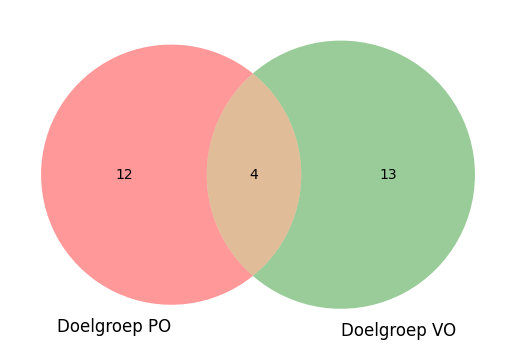

In [191]:
from matplotlib_venn import venn2

venn2(
    [set(doelgroep_po.index), set(doelgroep_vo.index)],
    set_labels=["Doelgroep PO", "Doelgroep VO"],
)

[Text(0, 0, '11'), Text(0, 0, '4'), Text(0, 0, '1')]

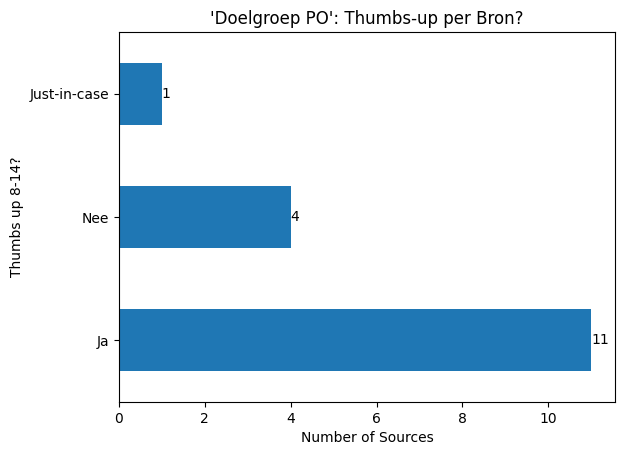

In [192]:
ax = (
    doelgroep_po["Thumbs up 8-14?"]
    .value_counts()
    .plot(
        kind="barh",
        title="'Doelgroep PO': Thumbs-up per Bron?",
        xlabel="Number of Sources",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '13'), Text(0, 0, '2'), Text(0, 0, '2')]

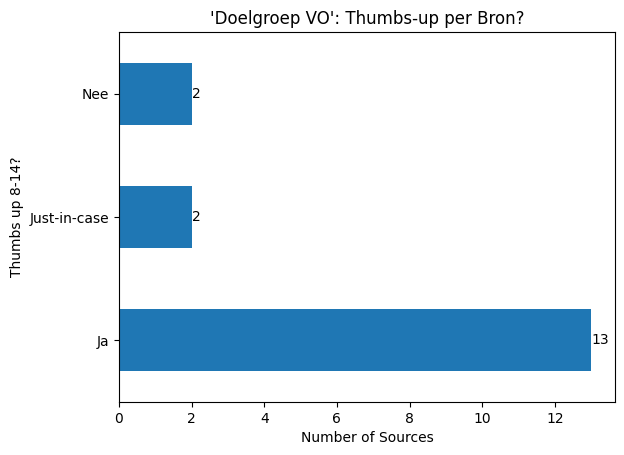

In [193]:
ax = (
    doelgroep_vo["Thumbs up 8-14?"]
    .value_counts()
    .plot(
        kind="barh",
        title="'Doelgroep VO': Thumbs-up per Bron?",
        xlabel="Number of Sources",
    )
)
ax.bar_label(ax.containers[0])

### Top-level domains

In [194]:
sources["tld"] = sources["URL Domein"].str.split(".").str[-1].str.split("/").str[0]
sources["tld"].value_counts()

tld
nl                                 390
com                                 76
be                                  40
org                                 13
net                                  7
nu                                   3
brussels                             2
fr                                   2
n                                    1
gov                                  1
122                                  1
info                                 1
shop                                 1
gent                                 1
redirect                             1
do?ctx=46163,46173&anav=4154073      1
html                                 1
Name: count, dtype: int64

[Text(0, 0, '(128 / 390)'),
 Text(0, 0, '(6 / 76)'),
 Text(0, 0, '(27 / 40)'),
 Text(0, 0, '(7 / 13)'),
 Text(0, 0, '(3 / 7)')]

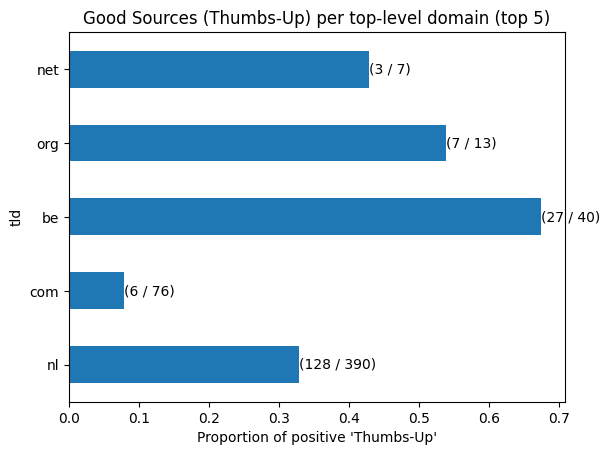

In [195]:
n = 5
tlds = pd.Series(sources["tld"].value_counts()[:n])

ja_counts = pd.Series(
    [
        len(sources.loc[(sources["tld"] == tld) & (sources["Thumbs up 8-14?"] == "Ja")])
        for tld in tlds.index
    ],
    index=tlds.index,
)
ja_counts
ax = (ja_counts / tlds).plot(
    kind="barh",
    title=f"Good Sources (Thumbs-Up) per top-level domain (top {n})",
    xlabel="Proportion of positive 'Thumbs-Up'",
    legend=False,
)

bar_labels = [
    f"({int(ja_counts[tld])} / { sources['tld'].value_counts()[tld]})"
    for tld in tlds.index
]
ax.bar_label(ax.containers[0], labels=bar_labels)

## Queries and Result Pages

### Ok/Good/Bad for Students

[Text(0, 0, '35'),
 Text(0, 0, '20'),
 Text(0, 0, '15'),
 Text(0, 0, '9'),
 Text(0, 0, '2'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

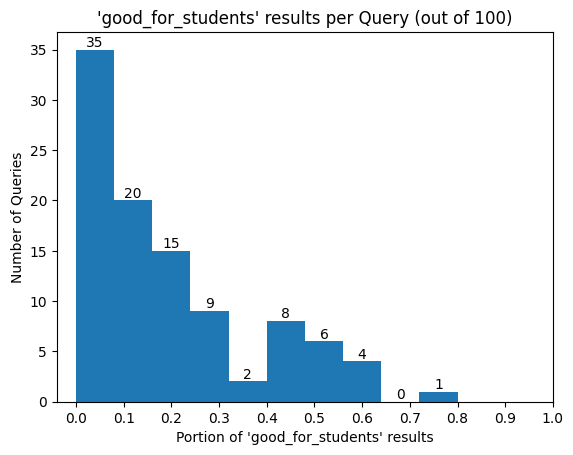

In [196]:
column = "good_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '65'),
 Text(0, 0, '26'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

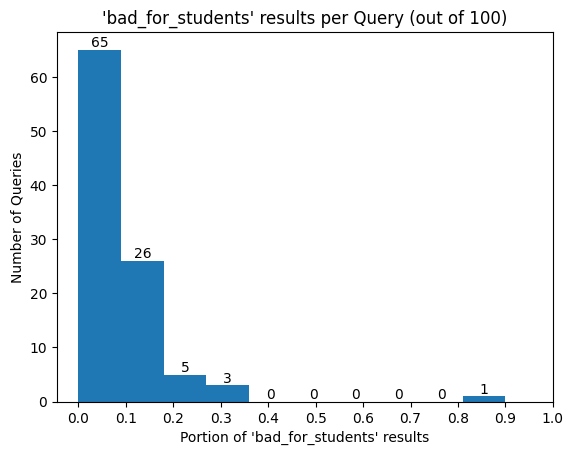

In [197]:
column = "bad_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '16'),
 Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '5'),
 Text(0, 0, '2')]

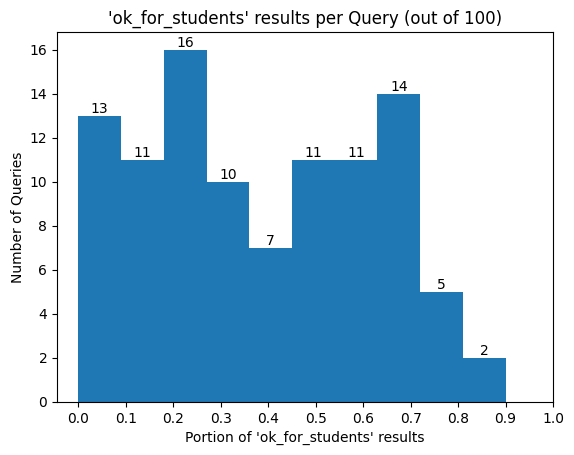

In [198]:
column = "ok_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

In [227]:
columns = ["good_for_students", "bad_for_students", "ok_for_students"]
results_sources.loc[~results_sources[columns].any(axis=1)]

Bron: Thumbs up?                                    Titel resultaat  \
1                Nee            Gratis woordenboek | Van Dale NEDERLAND   
18               Nee  D-reizen - Cruise Middellandse Zee – Veel keuz...   
35               Nee  Max Havelaar Koffie - Alles Over Deze Fairtrad...   
45               Nee            Gratis woordenboek | Van Dale NEDERLAND   
85               Nee                 Cristiano Ronaldo (@Cristiano) / X   
..               ...                                                ...   
936              Nee                              Stoomschip - Wikikids   
943              Nee  Lijst van gouverneurs en commissarissen van de...   
969              Nee                             Knups - Wist je datjes   
970              Nee  33 Nutteloze feitjes om enorm indruk mee te ma...   
972              Nee  23 Rare feitjes waar je niks aan hebt maar die...   

                                        Link/resultaat  \
1    https://www.vandale.nl/gratis-woordenboek/nede...   
18   https://www.d-reizen.nl/cruise/middellandse-ze...   
35   https://www.koffiekwaliteit.nl/fairtrade-max-h...   
45   https://www.vandale.nl/gratis-woordenboek/nede...   
85                       https://twitter.com/Cristiano   
..                                                 ...   
936                     https://wikikids.nl/Stoomschip   
943  https://wikikids.nl/Lijst_van_gouverneurs_en_c...   
969                   https://www.knups.nl/wist-je-dat   
970  https://www.saarmagazine.nl/33-nutteloze-feitj...   
972  https://www.saarmagazine.nl/23-rare-feitjes-wa...   

                         Query      Relevant? vrije tags page  \
1         wat betekent schotse       relevant             NaN   
18            middellandse zee  niet_relevant             NaN   
35                keurmerk max       relevant             NaN   
45                       leven       relevant             NaN   
85                     ronaldo       relevant             NaN   
..                         ...            ...             ...   
936                 stoomschip       relevant             NaN   
943  De gouverneur van limburg       relevant             NaN   
969               wist je dat?       relevant        outdated   
970               wist je dat?       relevant             NaN   
972               wist je dat?       relevant             NaN   

             Bronnen DB                                 Bron: Inst/Bedrijf  \
1            vandale.nl              Van Dale Uitgevers, Utrecht/Antwerpen   
18          d-reizen.nl                                           D-reizen   
35   koffiekwaliteit.nl                                 koffiekwaliteit.nl   
45           vandale.nl              Van Dale Uitgevers, Utrecht/Antwerpen   
85        twitter.com X                                 X voorheen Twitter   
..                  ...                                                ...   
936         wikikids.nl  Stichting Wikikids, ondersteund door Kennisnet...   
943         wikikids.nl  Stichting Wikikids, ondersteund door Kennisnet...   
969            knups.nl                                           Knups.nl   
970     saarmagazine.nl                       Saar Magazine, Snippet Media   
972     saarmagazine.nl                       Saar Magazine, Snippet Media   

    Toegankelijkheid doelgroep (indruk) Soort Resultaat  ...  \
1                               complex     informatief  ...   
18                                  nvt    navigational  ...   
35                redelijk_begrijpelijk     informatief  ...   
45                redelijk_begrijpelijk     informatief  ...   
85                            eenvoudig    navigational  ...   
..                                  ...             ...  ...   
936               redelijk_begrijpelijk     informatief  ...   
943                             complex     informatief  ...   
969               redelijk_begrijpelijk     informatief  ...   
970               redelijk_begrijpelijk     info

In [241]:
columns = ["good_for_students", "bad_for_students"]
results_sources.loc[results_sources[columns].all(axis=1)]

Bron: Thumbs up?                                    Titel resultaat  \
401               Ja  Correct gebruik van aanhalingstekens – Correct...   

                                        Link/resultaat  \
401  https://www.correctnederlands.nl/correct-gebru...   

                          Query Relevant? vrije tags page  \
401  wat is een begin aanhaling  relevant             NaN   

               Bronnen DB                  Bron: Inst/Bedrijf  \
401  correctnederlands.nl  Correct Nederlands, Frank den Hond   

    Toegankelijkheid doelgroep (indruk) Soort Resultaat  ...  \
401               redelijk_begrijpelijk     informatief  ...   

    SlimZ Resultaten DB Resultaten: toegankelijkheid Cookie info page  \
401                 NaN                          NaN              NaN   

    More examples Related to Resultaten DB 01 (1) (Bronnen DB) Res: Ranking  \
401           NaN                                          NaN           10   

    Res: soort result  ok_for_students  good_for_students  bad_for_students  
401        informatief            True               True              True  

[1 rows x 61 columns]

### Soort Resultaten Distribution per Query

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/2519624949.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '25'),
 Text(0, 0, '21')]

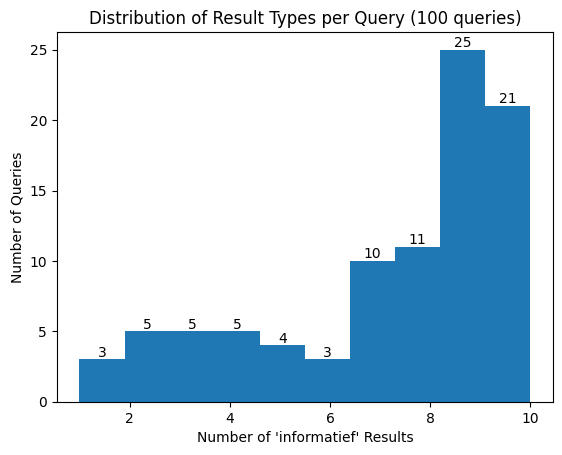

In [199]:
column = "Soort Resultaat"
value = "informatief"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/1416800553.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '5')]

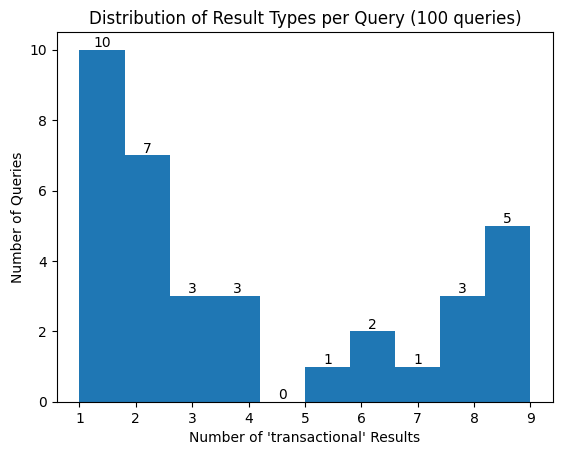

In [200]:
column = "Soort Resultaat"
value = "transactional"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/3201790118.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '28'),
 Text(0, 0, '18'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2')]

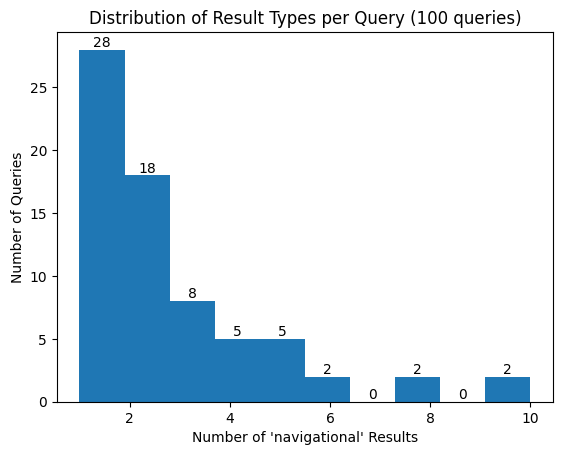

In [201]:
column = "Soort Resultaat"
value = "navigational"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

### Accessibility Distribution per Query

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/3774244460.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '16'),
 Text(0, 0, '9'),
 Text(0, 0, '16'),
 Text(0, 0, '7'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

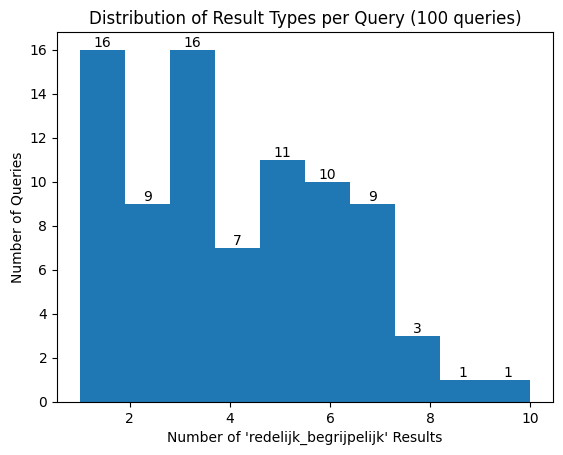

In [202]:
column = "Toegankelijkheid doelgroep (indruk)"
value = "redelijk_begrijpelijk"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_52598/1130612084.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

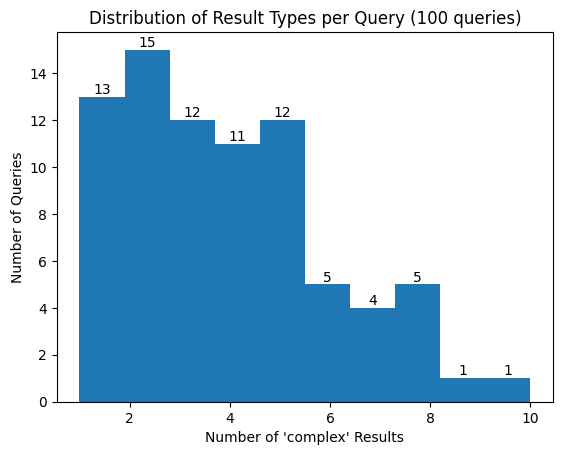

In [203]:
column = "Toegankelijkheid doelgroep (indruk)"
value = "complex"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

### Age

Text(0, 0.5, 'Number of Queries')

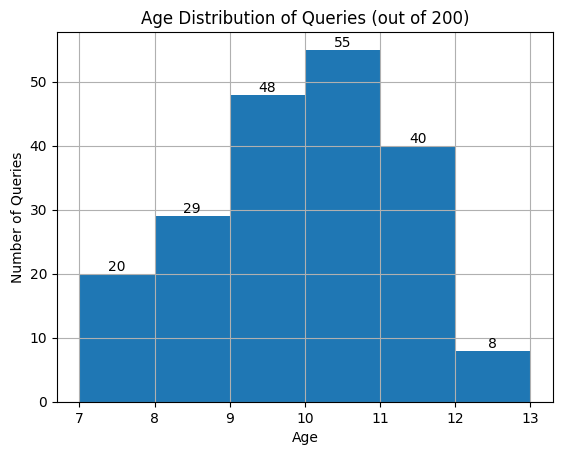

In [204]:
bins = range(all_queries["Leeftijd"].min(), all_queries["Leeftijd"].max() + 2)

hist = all_queries.hist(column="Leeftijd", bins=bins)
for ax in hist.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Number of Queries")
    ax.bar_label(ax.containers[0])
ax.title.set_text(f"Age Distribution of Queries (out of {len(all_queries)})")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Queries")

### Query Length

[Text(0, 0, '108'),
 Text(0, 0, '50'),
 Text(0, 0, '22'),
 Text(0, 0, '10'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

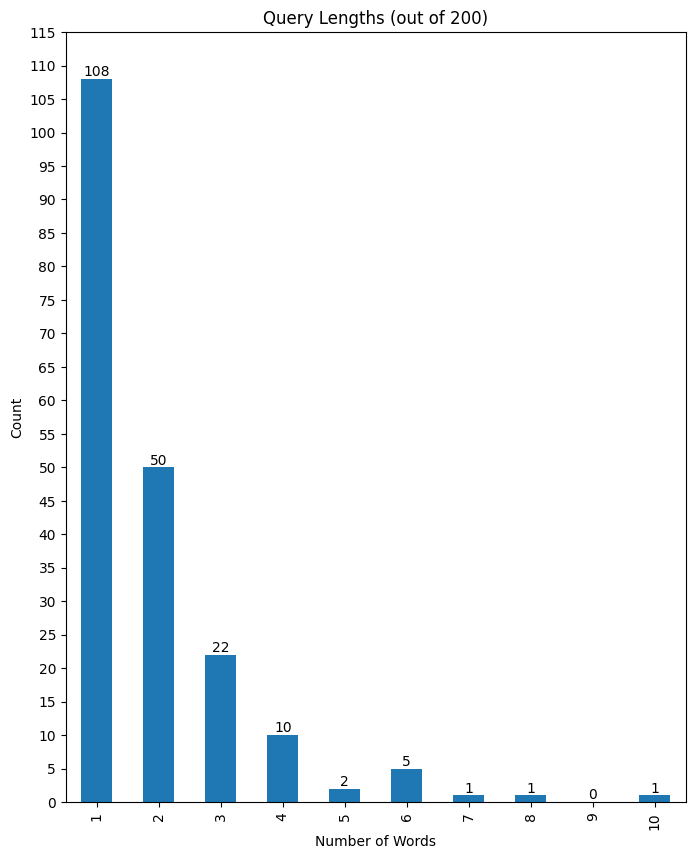

In [205]:
lengths = all_queries["Query"].str.strip().str.split().str.len().value_counts()
values = range(1, lengths.index.max() + 1)

ax = lengths.reindex(values, fill_value=0).plot(
    kind="bar",
    title=f"Query Lengths (out of {len(all_queries)})",
    ylabel="Count",
    xlabel="Number of Words",
    figsize=(8, 10),
    yticks=range(0, 120, 5),
)
ax.bar_label(ax.containers[0])

### Query Type

[Text(0, 0, '16'),
 Text(0, 0, '19'),
 Text(0, 0, '36'),
 Text(0, 0, '55'),
 Text(0, 0, '74')]

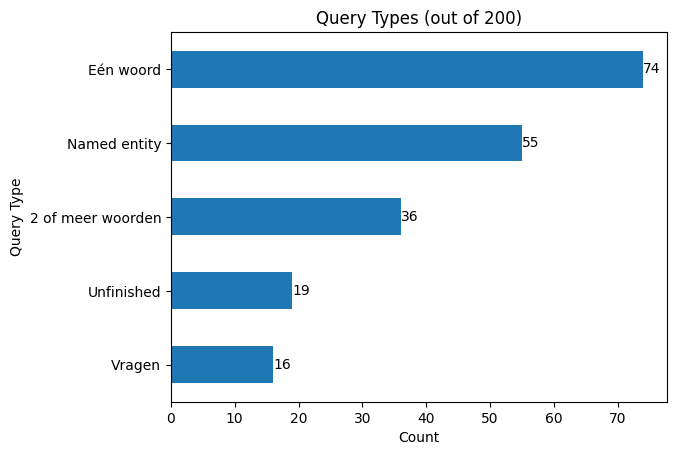

In [206]:
ax = (
    all_queries["Soort Query (select)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Query Types (out of {len(all_queries)})",
        ylabel="Query Type",
        xlabel="Count",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '16'),
 Text(0, 0, '24'),
 Text(0, 0, '36')]

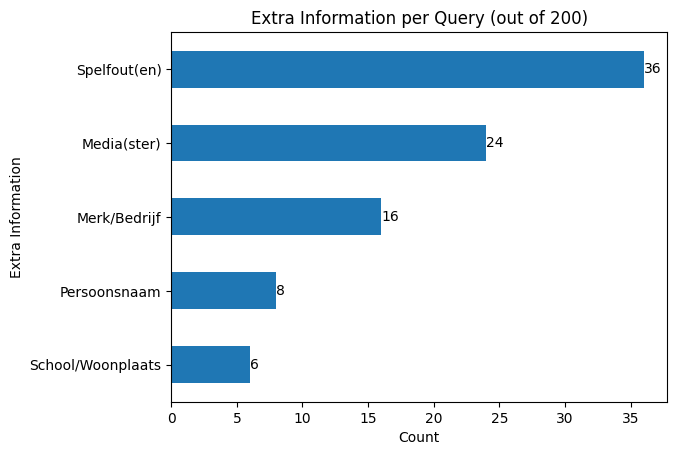

In [207]:
ax = (
    all_queries["Extra (multi)"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Extra Information per Query (out of {len(all_queries)})",
        xlabel="Count",
        ylabel="Extra Information",
    )
)
ax.bar_label(ax.containers[0])

### Result Page Extras

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '68'),
 Text(0, 0, '86')]

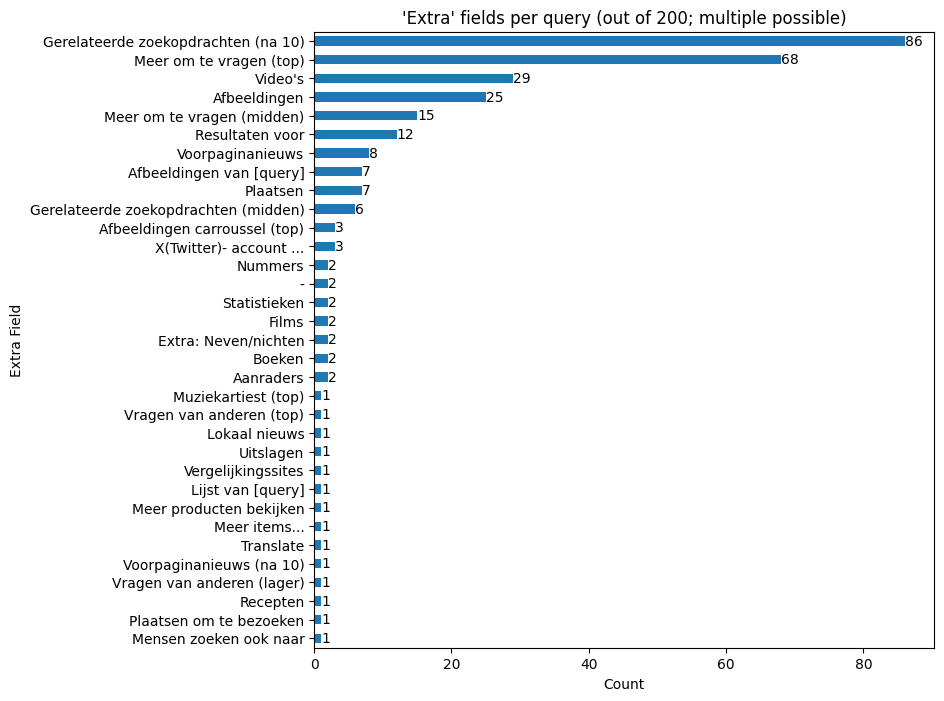

In [208]:
ax = (
    all_queries["Extra (top-down)"]
    .str.split(", ")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"'Extra' fields per query (out of {len(all_queries)}; multiple possible)",
        figsize=(8, 8),
        xlabel="Count",
        ylabel="Extra Field",
    )
)
ax.bar_label(ax.containers[0])

# Export

In [209]:
%pip install nbconvert rpds-py==0.5.3


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [242]:
!jupyter nbconvert --to markdown analysis.ipynb

zsh:1: /Users/carstenschnober/.local/bin/jupyter: bad interpreter: /Users/carstenschnober/opt/anaconda3/envs/SoS/bin/python: no such file or directory
[NbConvertApp] Converting notebook analysis.ipynb to markdown
[NbConvertApp] Support files will be in analysis_files/
[NbConvertApp] Writing 242576 bytes to analysis.md
